# Figures for the paper

In [1]:
from scipy.integrate import quad
from numpy import *
from matplotlib.pylab import *
import matplotlib as mpl
%matplotlib inline
from matplotlib.transforms import Bbox

In [2]:
import PIL.Image as Image
import pickle

In [1]:
rc('text',usetex=True)
# rc('text.latex',preamble=r'\usepackage{amssymb}')
rc('text.latex',preamble='''\\usepackage{amssymb}\n\\usepackage{siunitx}\n\DeclareSIUnit\Molar{\\textsc{m}}\n
\def\\V{\\textrm{V}}\n
\def\\A{\\textrm{A}}
\def\\C{\\textrm{C}}
\def\\R{\\textrm{R}}
\def\\t{\\textrm{t}}
''')

rcParams['savefig.pad_inches'] = 0


NameError: name 'rc' is not defined

In [4]:
redcolor = '#dd1c77' # actually magenta

In [5]:
SMALL_SIZE = 13
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

rc('font',size = BIGGER_SIZE,family = 'Arial')
rc('axes',titlesize = BIGGER_SIZE)
rc('axes',labelsize = BIGGER_SIZE)
rc('xtick',labelsize = BIGGER_SIZE)
rc('ytick',labelsize = BIGGER_SIZE)
rc('legend',handlelength= 1.0,fontsize = MEDIUM_SIZE)
rc('figure',titlesize = BIGGER_SIZE)

In [6]:
alphabet = []
for letter in range(65, 91):
    alphabet.append(chr(letter))
    
print(alphabet)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [7]:
def getint(x):
    xc = x*1.0
    xc.sort()
    sh = xc.shape[0]
    xmed = xc[sh//2]
    s0= int(sh*(1-.6827)/2)
    s1 = sh-s0
    x0 = xc[s0]
    x1 = xc[s1]
    s0b= int(sh*(1-.95)/2)
    s1b = sh-s0b
    x0b = xc[s0b]
    x1b = xc[s1b]
    return((xmed,x0,x1,x0b,x1b))

In [8]:
def numbering_panels(axs,pos = None,labels=alphabet):
    if pos is None:
        pos = zeros((len(axs),2))
        pos[:,1] = 1-pos[:,1]
        
    for i,ax in enumerate(axs):
        ax.text(pos[i,0],pos[i,1],labels[i],horizontalalignment='right',verticalalignment='top', transform=ax.transAxes)
    return

In [9]:
def plot_trace(data,t,ax=None,c='C0',band= None,label= None,linestyle='-'):
    if ax is None:
        ax = gca()
    vtracso = data*1.0
    vtracso.sort(axis=1)
    sh = vtracso.shape[1]
    nmed = sh//2
    nl1, nv1 = int(sh*0.16),int(sh*(1-0.16))
    nl2, nv2 = int(sh*0.025),int(sh*(1-0.025))

    if label is None:
        ax.plot(t,vtracso[:,nmed],c=c,linestyle=linestyle)
    else:
        ax.plot(t,vtracso[:,nmed],c=c,linestyle=linestyle,label=label)
        
    if band == 0:
        pass
    elif band == 1:
        ax.fill_between(t,vtracso[:,nl1],vtracso[:,nv1],color=c,alpha=0.5)
    elif band ==2:
        ax.fill_between(t,vtracso[:,nl2],vtracso[:,nv2],color=c,alpha=0.5)
    else:
        ax.fill_between(t,vtracso[:,nl1],vtracso[:,nv2],color=c,alpha=0.2)
        ax.fill_between(t,vtracso[:,nl1],vtracso[:,nv1],color=c,alpha=0.5)
    return(ax)

# Scale bars
def scalebar(ax,x0,y0,dx,dy,xlab = '', ylab = '', color = 'k'):
    xs = x0+linspace(0,dx,4)
    ax.vlines(x0,y0,y0+dy,color = color)
    ax.plot(xs,xs*0+y0,c = color)
    ax.text(x0,y0+dy*.3,ylab,horizontalalignment="right")   
    ax.text(x0+dx/2,y0-dy*0.02,xlab,verticalalignment="top",horizontalalignment="center")     

def running_mean(x, N, padding = "valid"):
    if padding =="same":
        N2 = N//2
        Nf = float(N)
        cumsumt = cumsum(concatenate((zeros(1),x,zeros(N-1))))
        runmean = (cumsumt[N:] - cumsumt[:-N]) / Nf
        runmean[-N+1:] = runmean[-N+1:]*Nf/(arange(Nf-1,0,-1))
    elif padding =="valid":
        cumsumt = cumsum(insert(x, 0, 0))
        runmean = (cumsumt[N:] - cumsumt[:-N]) / float(N)
    return(runmean)
def running_std(x, N, padding = "valid"):
    if padding =="same":
        N2 = N//2
        Nf = float(N)
        cumsumt = cumsum(concatenate((zeros(1),x,zeros(N-1))))
        runmean = (cumsumt[N:] - cumsumt[:-N]) / Nf
        runmean[-N+1:] = runmean[-N+1:]*Nf/(arange(Nf-1,0,-1))
        cumsumt = cumsum(concatenate((zeros(1),x*x,zeros(N-1))))
        runstd = (cumsumt[N:] - cumsumt[:-N]) / Nf
        runstd[-N+1:] = runmean[-N+1:]*Nf/(arange(Nf-1,0,-1))
        runstd = sqrt(runstd-runmean**2)
    elif padding =="valid":
        cumsumt = cumsum(insert(x, 0, 0))
        runmean = (cumsumt[N:] - cumsumt[:-N]) / float(N)
        
        cumsumt = cumsum(insert(x**2, 0, 0))
        runstd = (cumsumt[N:] - cumsumt[:-N]) / float(N)
        runstd = sqrt(runstd-runmean**2)
    return(runstd)

In [10]:
def gradient_image(ax, extent, direction=0.3, cmap_range=(0, 1), **kwargs):
    """
    Draw a gradient image based on a colormap.

    Parameters
    ----------
    ax : Axes
        The axes to draw on.
    extent
        The extent of the image as (xmin, xmax, ymin, ymax).
        By default, this is in Axes coordinates but may be
        changed using the *transform* kwarg.
    direction : float
        The direction of the gradient. This is a number in
        range 0 (=vertical) to 1 (=horizontal).
    cmap_range : float, float
        The fraction (cmin, cmax) of the colormap that should be
        used for the gradient, where the complete colormap is (0, 1).
    **kwargs
        Other parameters are passed on to `.Axes.imshow()`.
        In particular useful is *cmap*.
    """
    phi = direction * np.pi / 2
    v = np.array([np.cos(phi), np.sin(phi)])
    X = np.array([[v @ [1, 0], v @ [1, 1]],
                  [v @ [0, 0], v @ [0, 1]]])
    a, b = cmap_range
    X = a + (b - a) / X.max() * X
    im = ax.imshow(X, extent=extent, interpolation='bicubic',
                   vmin=0, vmax=1, **kwargs)
    return im


def gradient_bar(ax, x, y, width=0.5, bottom=0, cmap = cm.Blues_r):
    for left, top in zip(x, y):
        right = left + width
        gradient_image(ax, extent=(left, right, bottom, top),
                       cmap=cmap, cmap_range=(0.2,1.0),direction=1)

#plot(randn(5))
from matplotlib.colors import LinearSegmentedColormap
cdict = {'red':   [[0.0,  0.5, 0.5],
                   [0.5,  1.0, 1.0],
                   [1.0,  1.0, 1.0]],
         'green': [[0.0,  0.0, 0.0],
                   [0.5,  0.0, 0.0],
                   [1.0,  1.0, 1.0]],
         'blue':  [[0.0,  0.5, 0.5],
                   [0.5,  1.0, 1.0],
                   [1.0,  1.0, 1.0]]}
newcmp = LinearSegmentedColormap('Magentas', segmentdata=cdict, N=256)

plt.register_cmap(cmap=newcmp)

def plot_syninputs(fig,ax):
    xs = linspace(0,120,1000)
    ton, toff = (0.5,17.0)
    yglu = exp(-xs/toff)-exp(-xs/ton); yglu = yglu/max(yglu)
    ax.plot(concatenate(([-10],xs)),concatenate(([0],yglu)),'-',c=redcolor,linewidth= 2,alpha=0.5,label='NMDA')
    ax.set(autoscale_on=False)


    ton, toff = (0.1,1.8)
    trise = ton*toff/(ton-toff)*log(ton/toff)
    yglu = exp(-xs/toff)-exp(-xs/ton); yglu = yglu/max(yglu)
    ax.plot(concatenate(([-10],xs)),concatenate(([0],yglu))-1.015,'-',c=redcolor,linewidth= 2,label='AMPA')

    ton, toff = (0.5,15.0)
    trise = ton*toff/(ton-toff)*log(ton/toff)
    ygaba = exp(-xs/toff)-exp(-xs/ton); ygaba= ygaba/max(ygaba)
    ax.plot(concatenate(([-10],xs)),concatenate(([0],ygaba))-1.015*2,'g-',linewidth= 2,label='GABA')
    #gradient_bar(ax,[20],[1.25],3*toff,1.05,cmap = cm.Greens_r)
    ax.set_yticks(ticks=array([0,1.]))
    #gradient_bar(ax,[0],[1.27+.2],3*toff,1.27,cmap = newcmp)


    ax.set_aspect('auto')
    ax.set_xlim(-2,50)
    ax.set_ylim(-2.1,1.15)
    ax.set_xlabel('t (\si{\milli\second})')
    ax.set_ylabel('$\\textrm{G}/\\textrm{G}_{max}$',rotation=0, 
               horizontalalignment='left',
               verticalalignment='top')
    ax.yaxis.set_label_coords(0,1.05)
    #     ax.legend()   
    ax.annotate('NMDA',xy = (40,0.16))
    ax.annotate('AMPA',xy = (40,-0.95))
    ax.annotate('GABA',xy = (40,-1.88))

In [11]:
#Jupyters: Proper Spine Model v2 - Main experiments
with open("../SpineModel/All_baseline_datasetv2.pickle","rb") as f:
    vavgT,mesT,vtracsT,vtracsDT,vtracsST,CtracsT,me2T,_,dataT = pickle.load(f)

with open("../SpineModel/All_baseline_depinhv2.pickle","rb") as f:
    messh,iPSDsh,posish,mesDiSI,spdataI = pickle.load(f)
   
        


#n = 800
#sel = mVb[:,-2] == 1
#s1 = arange(mVs.shape[0])[sel]
#s2 = arange(mVs.shape[0])[~sel]
#xt,yt = mVb[s1,-1],mVb[s1,2]
#sel = xt.argsort(); xt = xt[sel]; yt = yt[sel]
# xtSiS = running_mean(xt,n)
# #yt2 = running_std(yt,n)
# ytSiS = running_mean(yt,n)

# xt,yt = mVb[s2,-1],mVb[s2,2]
# sel = xt.argsort(); xt = xt[sel]; yt = yt[sel]
# nDiS = 200
# xtDiS = running_mean(xt,nDiS)
# #yt2 = running_std(yt,n)
# ytDiS = running_mean(yt,nDiS)

# xt,yt = mVbI[:,-1],mVbI[:,2]
# sel = xt.argsort(); xt = xt[sel]; yt = yt[sel]
# xtspI = running_mean(xt,n)
# ytspI = running_mean(yt,n)

# xt,yt = mVbI[:,-1],mVbI[:,5]
# sel = xt.argsort(); xt = xt[sel]; yt = yt[sel]
# xtshI = running_mean(xt,n)
# #yt2 = running_std(yt,n)
# ytshI = running_mean(yt,n)


In [12]:
modeldt = 0.05
bands = 1

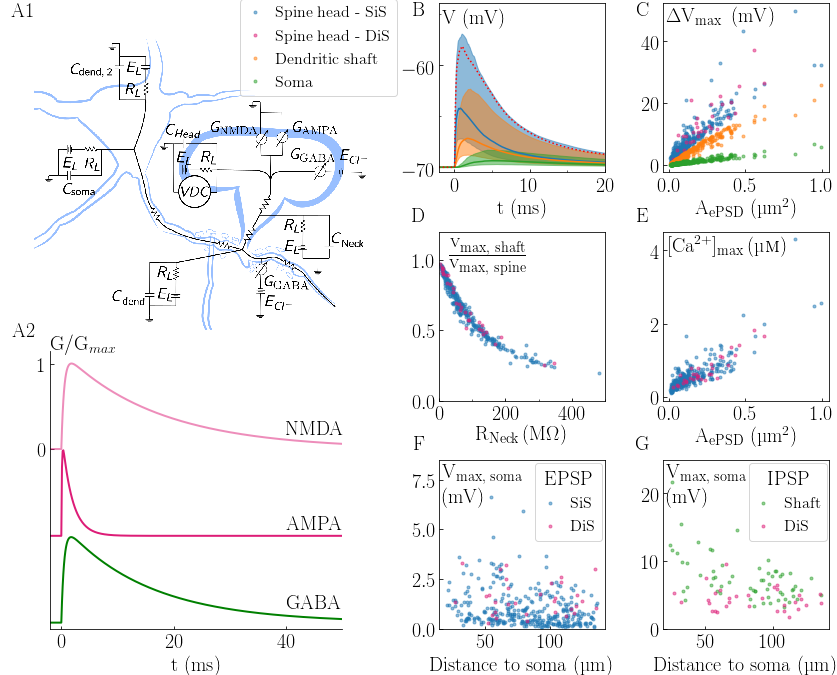

In [70]:
im = Image.open('../Neuron_persp9.png')
height = im.size[1]
im = np.array(im).astype(np.float) / 255
fig = figure(figsize=(15,11.5))
gs = mpl.gridspec.GridSpec(3, 4,  wspace=0.35, hspace=.35) # 2x3 grid

ax0 = fig.add_subplot(gs[:1, 0:2]) # first full col
axl0 = fig.add_subplot(gs[1:, 0:2]) # first full col
ax1 = fig.add_subplot(gs[0, 2]) # first row, second col
ax3 = fig.add_subplot(gs[0, 3]) # first row, third col
ax2 = fig.add_subplot(gs[1, 2]) # 2nd row, second col
ax4 = fig.add_subplot(gs[1, 3]) # 2nd row, 3rd col
axl1 = fig.add_subplot(gs[2, 2]) # 3nd row, second col
axl2 = fig.add_subplot(gs[2, 3]) # 3nd row, 3rd col

plot_syninputs(fig,axl0)

ax0.imshow(im)
ax0.set_axis_off()

# Plots in fig EPSP
s1 = dataT['nPSD']==1.0
s2 = dataT['nPSD']==2.0

plot_trace(vtracsT[:,s1],arange(vtracsT.shape[0])*modeldt-100+5-25,ax1,c='C0',band = bands)
plot_trace(vtracsDT[:,s1],arange(vtracsDT.shape[0])*modeldt-100+5-25,ax1,c='C1',band = bands)
plot_trace(vtracsST[:,s1],arange(vtracsST.shape[0])*modeldt-100+5-25,ax1,c='C2',band = bands)
plot_trace(vtracsT[:,s2],arange(vtracsT.shape[0])*modeldt-100+5-25,ax1,c='r',band = 0,linestyle=':')





# Plot in fig Delta V - V_dend
s0 = dataT['A2']>0
s1 = ~s0
ax2.plot(abs(mesT[s1,0]),(mesT[s1,2])/mesT[s1,1],'.',label="Spine head",alpha=0.5)
ax2.plot(abs(mesT[s0,0]),(mesT[s0,2])/mesT[s0,1],'.',c=redcolor,label="Spine head",alpha=0.5)

# ax2.plot(abs(mesT[s1,0]),mesT[s1,1]-mesT[s1,2],'.',label="Spine head",alpha=0.5)
# ax2.plot(abs(mesT[s0,0]),mesT[s0,1]-mesT[s0,2],'.',c=redcolor,label="Spine head",alpha=0.5)


# Plot in fig Calcium
ax4.plot(abs(dataT['A1'][s1]),mesT[s1,4],'.',label="Spine head",alpha=0.5)
ax4.plot(abs(dataT['A1'][s0]),mesT[s0,4],'.',c=redcolor,label="Spine head",alpha=0.5)

# Plot in fig Delta V max
EL0 = -70
ax3.plot(abs(dataT['A1'][s1]),mesT[s1,1],'C0.',label="Spine head - SiS",alpha=0.5)
ax3.plot(abs(dataT['A1'][s0]),mesT[s0,1],'.',c=redcolor,label="Spine head - DiS",alpha=0.5)
ax3.plot(abs(dataT['A1']),me2T[:,3]-EL0,'C1.',label="Dendritic shaft",alpha=0.5)
ax3.plot(abs(dataT['A1']),mesT[:,3],'C2.',label="Soma",alpha=0.5)
#ax3.plot(abs(mesT[s0,-3]/1e-3),mesT[s0,3],'r.',label="Spine head",alpha=0.5)

#mVav = mVsshI[:,2].mean()
seldisi = spdataI['A2']>0
axl2.plot(posish,messh[:,3],'C2.',alpha=0.5,label='Shaft')#,label='Axo-dendritic')

axl2.plot(spdataI['Dss'][seldisi],mesDiSI[seldisi,3],'.',c=redcolor,alpha=0.5,label='DiS')#,label='Axo-spinous')


axl2.set_ylabel('$\\V_\\textrm{\Large max, soma}$\n(\si{\milli\\volt})',rotation=0, 
               horizontalalignment='left',
               verticalalignment='top')
axl2.set_xlabel('Distance to soma (\si{\micro\meter})')


#xt = linspace(min(mVsshI[:,-1]),max(mVsshI[:,-1]))
#axl2.plot(xt,interp(xt,xtshI,ytshI),'C2')

#axl2.plot(xt,interp(xt,xtspI,ytspI),'r')

#axl2.plot(xt,yt,'r',label='DiS')
#axl2.legend(title='Excitation',loc=(0.5,0.65))
#axl2.set_ylabel('$V_{\max}$ in soma',rotation = 0)

#axl2.fill_between(xt,yt+yt2,yt-yt2,color = 'r',alpha=0.7,band = 0)


s1v = dataT['nPSD']==1.0
s2v = dataT['nPSD']==2.0
axl1.plot(dataT['Dss'][s1v],mesT[s1v,3],'C0.',alpha=0.5,label='SiS')
axl1.plot(dataT['Dss'][s2v],mesT[s2v,3],'.',c=redcolor,alpha=0.5,label='DiS')

axl1.set_ylabel('$\\V_\\textrm{\Large max, soma}$\n(\si{\milli\\volt})',rotation=0, 
               horizontalalignment='left',
               verticalalignment='top')
axl1.set_xlabel('Distance to soma (\si{\micro\meter})')

xt = linspace(min(dataT['Dss']),max(dataT['Dss']))
#axl1.plot(xt,interp(xt,xtDiS,ytDiS),'r')
#axl1.plot(xt,interp(xt,xtSiS,ytSiS),'C0')#
#axl1.plot(xt,xt*0+getint(ytSiS)[0],'C0')

#axl2.set_ylabel('$V_{\max}$ in soma',rotation = 0)

#axl2.fill_between(xt,yt+yt2,yt-yt2,color = 'r',alpha=0.7,band = 0)


# Accesories

# scalebar(ax1,40,-65,5,2,xlab = '5 ms', ylab = '2 mV  ', color = 'k')
#ax1.set_axis_off()
ax2.set_xlabel("$\\R_\\textrm{\Large Neck}\, (\si{\Mohm})$")
# ax2.set_ylabel("$[\\V_\\textrm{\Large spine}-\\V_\\textrm{\Large shaft}]_\\textrm{\Large max}$\n(\si{\milli\\volt})",rotation=0, 
#                horizontalalignment='left',
#                verticalalignment='top')
ax2.set_ylabel("$\\frac{\\V_\\textrm{\Large max, shaft}}{\\V_\\textrm{\Large max, spine}}$",rotation=0, 
               horizontalalignment='left',
               verticalalignment='top')

ax4.set_xlabel("$\\A_\\textrm{\Large ePSD}$ (\si{\square\micro\meter})")
ax4.set_ylabel("$[\\textrm{Ca}^{2+}]_\\textrm{\Large max}\, $(\si{\micro\Molar})",rotation=0, 
               horizontalalignment='left',
               verticalalignment='top')
#ax3.set_xlabel("- $I_{s,max}$(pA)")
ax3.set_xlabel("$\\A_\\textrm{\Large ePSD}$ (\si{\square\micro\meter})")

ax3.set_ylabel("$\Delta\\V_\\textrm{\Large max}\,$ (\si{\milli\\volt})",rotation=0, 
               horizontalalignment='left',
               verticalalignment='top')
ax3.tick_params(direction="in")
ax4.tick_params(which='both',direction="in")
ax2.tick_params(direction="in")
axl1.tick_params(direction="in")
axl2.tick_params(direction="in")
ax1.tick_params(which='both',direction="in")
axl0.tick_params(direction="in")

ax3.set_xticks(ticks=arange(0,1.5,0.5))
ax4.set_xticks(ticks=arange(0,1.5,0.5))

ax2.xaxis.set_minor_locator(FixedLocator(arange(100,600,100)))
ax2.xaxis.set_major_locator(FixedLocator(arange(0,600,200)))
ax2.xaxis.set_tick_params(which='minor',direction='in')
#ax4.xaxis.set_label_coords(0.5,-0.12)

#ax3.xaxis.set_label_coords(0.5,-0.12)
#ax2.xaxis.set_label_coords(0.5,-0.12)
#ax4.xaxis.set_label_coords(0.5,-0.12)

ax1.yaxis.set_label_coords(0.02,.97)
# ax2.yaxis.set_label_coords(0.02,.96)
ax2.yaxis.set_label_coords(0.06,.96)
ax3.yaxis.set_label_coords(0.02,.97)
ax4.yaxis.set_label_coords(0.035,.97)
axl2.yaxis.set_label_coords(0.02,.96)
axl1.yaxis.set_label_coords(0.02,.96)


#ax4.yaxis.set_label_coords(-.15,0.5)

ax3.legend(loc = (-2.55,0.45))
axl1.legend(title='EPSP',loc=(0.58,0.52))
axl2.legend(title='IPSP',loc=(0.52,0.52))

ax1.set_xlim(23-25,45-25)
ax1.set_ylim(-70.5,-54)
ax1.set_xlabel('t (\si{\milli\second})')
ax1.set_ylabel('V (\si{\milli\\volt})',rotation = 0 , 
               horizontalalignment='left',
               verticalalignment='top')


ax1.xaxis.set_minor_locator(FixedLocator([5,15]))
ax1.xaxis.set_major_locator(FixedLocator([0,10,20]))
ax1.yaxis.set_minor_locator(FixedLocator([-65,-55]))
ax1.yaxis.set_major_locator(FixedLocator([-70,-60,-50]))
ax1.xaxis.set_label_coords(0.5,-0.155)

extent = list(ax2.axis())
ax2.set_ylim(extent[2],extent[3]*1.17)
axl1.set_ylim(0,8.5)
axl2.set_ylim(0,25)

axl0.spines['top'].set_color('none')
axl0.spines['right'].set_color('none')

bboxor = ax0.figbox._points
dy =  bboxor[1,1]-bboxor[0,1]
dx = bboxor[1,0]-bboxor[0,0]
bboxn = [[bboxor[0,0]+dx*.45,bboxor[0,1]]-dy*.93,[bboxor[1,0]+dx*.15,bboxor[1,1]-dy*.21]]
ax0.set_position(Bbox(bboxn))


bboxor = axl0.figbox._points
dy =  bboxor[1,1]-bboxor[0,1]
dx = bboxor[1,0]-bboxor[0,0]
bboxn = [[bboxor[0,0]+dx*.15,bboxor[0,1]],[bboxor[1,0]-dx*.1,bboxor[1,1]-dy*.3]]
axl0.set_position(Bbox(bboxn))

ax2.set_ylim(0,1.2)
ax2.set_xlim(0,500)

#ax4.set_ylim(0,4.5)
axs = [ax0,ax1,ax3,ax2,ax4,axl1,axl2,axl0]
pos = zeros((len(axs),2))
pos[:,1] = 1-pos[:,1]
pos[:3,1] = 1.02
pos[0,1] = 1.127

pos[3:,1] = 1.15
pos[1:,0] = -0.08
pos[-1,:] = (-.052,1.1)
numbering_panels(axs,pos,labels=['A1','B','C','D','E','F','G','A2'])
savefig("Figure_Model_1v2.png",dpi = 300, tight_layout = True)

#avefig("Figure_Model_1bx2.pdf",dpi = 300, tight_layout = True)



In [71]:
plt.text?

1.7145178164873134 0.34388805503348924


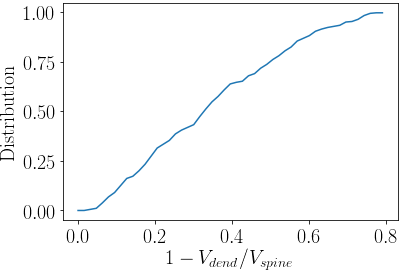

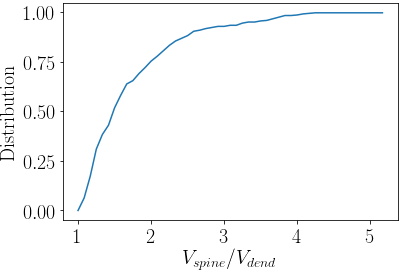

In [72]:
spden = (1-mesT[:,2]/mesT[:,1])
densp = (mesT[:,1]/mesT[:,2])

p = linspace(0,0.79,51)
prob = zeros(p.shape[0])
prob = [(spden<pt).sum()/mesT.shape[0] for pt in p]
plot(p,prob)

xlabel('$1-V_{dend}/V_{spine}$')
ylabel('Distribution')
figure()
p = linspace(1,max(densp),51)
prob = zeros(p.shape[0])
prob = [(densp<pt).sum()/mesT.shape[0] for pt in p]
plot(p,prob)
xlabel('$V_{spine}/V_{dend}$')
ylabel('Distribution')
print(densp.mean(),spden.mean())

In [73]:
mesT[densp>5,1:3],dataT['Rneck'][densp>5],dataT['Ln'][densp>5],dataT['minDneck'][densp>5]

(array([[20.96410164,  4.05161745]]), spID
 180609DDT4_F    483.484543
 Name: Rneck, dtype: float64, spID
 180609DDT4_F    3.54271
 Name: Ln, dtype: float64, spID
 180609DDT4_F    57.491339
 Name: minDneck, dtype: float64)

(array([125., 128.,  52.,  26.,  18.,   6.,   8.,   1.,   0.,   1.]),
 array([ 39.71187943,  92.65266617, 145.5934529 , 198.53423963,
        251.47502637, 304.4158131 , 357.35659984, 410.29738657,
        463.2381733 , 516.17896004, 569.11974677]),
 <a list of 10 Patch objects>)

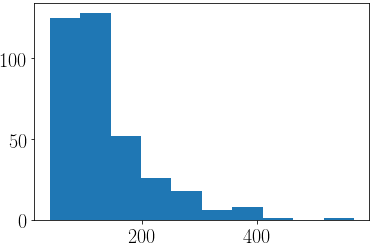

In [74]:
hist(dataT['minDneck'])

0.0 -0.5368141053514172
0.10555555555555556 -0.5346731967953658
0.2111111111111111 -0.5321379457404279
0.31666666666666665 -0.5290895486747004
0.4222222222222222 -0.5253513097884582
0.5277777777777778 -0.5206439376445019
0.6333333333333333 -0.5144862622488968
0.7388888888888889 -0.5059323899892821
0.8444444444444444 -0.4926405287653002
0.95 -0.4645595919855896
142.85010146340025 3.0243381104900884 -0.5368141053514172


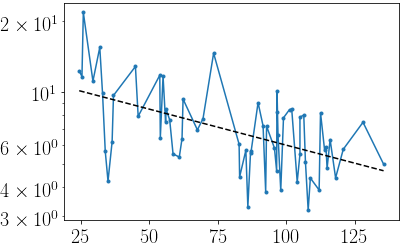

In [75]:
from scipy.stats import linregress

xt = 1.0*posish
#xt = linspace(min(xt),max(xt))
yt = 1.0*messh[:,3]
sel = xt.argsort()
yt = yt[sel]
xt = xt[sel]
for dt in linspace(0.,0.95,10):
    miny = min(yt)*dt
    ytb = log(yt-miny)
    slope, intercept, r_value, p_value, std_err = linregress(xt,ytb)
    print(dt,r_value)

plot(xt,yt,'.-')
yt = log(yt)
slope, intercept, r_value, p_value, std_err = linregress(xt,yt)
plot(xt,exp(xt*slope+intercept),'k--')
print(-1./slope,miny,r_value)
yscale('log')

0.95 -0.30128925063789247
0.9544444444444444 -0.3013133579504807
0.9588888888888889 -0.30133096074610255
0.9633333333333333 -0.30134057277129966
0.9677777777777777 -0.3013402089562324
0.9722222222222222 -0.30132712709332576
0.9766666666666667 -0.30129735848132494
0.981111111111111 -0.3012447504869593
0.9855555555555555 -0.30115865302668565
0.99 -0.30101666603046784
83.93407260379803 0.07884155251158873 -0.30134173259194497


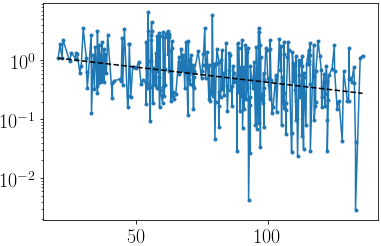

In [76]:
#xt = linspace(min(xtSis),max(xtSis))

sel = dataT['nPSD']==1.0
xt = 1.0*dataT['Dss'][sel]
#xt = linspace(min(xt),max(xt))
yt = 1.0*mesT[sel,3]
sel = xt.argsort()
yt = yt[sel]
xt = xt[sel]
for dt in linspace(0.95,0.99,10):
    miny = min(yt)*dt
    ytb = log(yt-miny)
    slope, intercept, r_value, p_value, std_err = linregress(xt,ytb)
    print(dt,r_value)

miny = min(yt)*.965
ytb = yt-miny
plot(xt,ytb,'.-')
yt = log(ytb)
slope, intercept, r_value, p_value, std_err = linregress(xt,yt)
plot(xt,exp(xt*slope+intercept),'k--')
print(-1./slope,miny,r_value)
yscale('log')

In [77]:
def gradient_image(ax, extent, direction=0.3, cmap_range=(0, 1), **kwargs):
    """
    Draw a gradient image based on a colormap.

    Parameters
    ----------
    ax : Axes
        The axes to draw on.
    extent
        The extent of the image as (xmin, xmax, ymin, ymax).
        By default, this is in Axes coordinates but may be
        changed using the *transform* kwarg.
    direction : float
        The direction of the gradient. This is a number in
        range 0 (=vertical) to 1 (=horizontal).
    cmap_range : float, float
        The fraction (cmin, cmax) of the colormap that should be
        used for the gradient, where the complete colormap is (0, 1).
    **kwargs
        Other parameters are passed on to `.Axes.imshow()`.
        In particular useful is *cmap*.
    """
    phi = direction * np.pi / 2
    v = np.array([np.cos(phi), np.sin(phi)])
    X = np.array([[v @ [1, 0], v @ [1, 1]],
                  [v @ [0, 0], v @ [0, 1]]])
    a, b = cmap_range
    X = a + (b - a) / X.max() * X
    im = ax.imshow(X, extent=extent, interpolation='bicubic',
                   vmin=0, vmax=1, **kwargs)
    return im


def gradient_bar(ax, x, y, width=0.5, bottom=0, cmap = cm.Blues_r):
    for left, top in zip(x, y):
        right = left + width
        gradient_image(ax, extent=(left, right, bottom, top),
                       cmap=cmap, cmap_range=(0.35,1.0),direction=1)

#plot(randn(5))
#ax = gca()
#ax.set(autoscale_on=False)
#gradient_bar(ax,[0],[0],3.,1.0)
#ax.set_aspect('auto')  

In [78]:
from matplotlib.colors import LinearSegmentedColormap

In [79]:
from matplotlib.colors import LinearSegmentedColormap
cdict = {'red':   [[0.0,  0.5, 0.5],
                   [0.5,  1.0, 1.0],
                   [1.0,  1.0, 1.0]],
         'green': [[0.0,  0.0, 0.0],
                   [0.5,  0.0, 0.0],
                   [1.0,  1.0, 1.0]],
         'blue':  [[0.0,  0.5, 0.5],
                   [0.5,  1.0, 1.0],
                   [1.0,  1.0, 1.0]]}
newcmp = LinearSegmentedColormap('Magentas', segmentdata=cdict, N=256)

plt.register_cmap(cmap=newcmp)

def plot_syninputs(fig,ax):
    xs = linspace(0,120,1000)
    ton, toff = (0.5,17.0)
    yglu = exp(-xs/toff)-exp(-xs/ton); yglu = yglu/max(yglu)
    ax.plot(concatenate(([-10],xs)),concatenate(([0],yglu)),'-',c=redcolor,linewidth= 2,alpha=0.5,label='NMDA')
    ax.set(autoscale_on=False)


    ton, toff = (0.1,1.8)
    trise = ton*toff/(ton-toff)*log(ton/toff)
    yglu = exp(-xs/toff)-exp(-xs/ton); yglu = yglu/max(yglu)
    ax.plot(concatenate(([-10],xs)),concatenate(([0],yglu))-1,'-',c=redcolor,linewidth= 2,label='AMPA')

    ton, toff = (0.5,15.0)
    trise = ton*toff/(ton-toff)*log(ton/toff)
    ygaba = exp(-xs/toff)-exp(-xs/ton); ygaba= ygaba/max(ygaba)
    ax.plot(concatenate(([-10],xs)),concatenate(([0],ygaba))-1-1,'g-',linewidth= 2,label='GABA')
    gradient_bar(ax,[20],[1.25],3*toff,1.05,cmap = cm.Greens_r)
    ax.set_yticks(ticks=array([0,1.]))
    gradient_bar(ax,[0],[1.27+.2],3*toff,1.27,cmap = newcmp)


    ax.set_aspect('auto')
    ax.set_xlim(-2,100)
    ax.set_ylim(-2.1,1.5)
    ax.set_xlabel('$t$ (ms)')
    ax.set_ylabel('$G/G_{max}$')
    ax.yaxis.set_label_coords(-0.03,0.4)
    ax.legend()
    ax.annotate('$\Delta t$',xy = (7,1.1))
    ax.annotate('',xy = (6,1.15),xytext = (0,1.15),arrowprops=dict(arrowstyle="<-"))
    ax.annotate('',xy = (14,1.15),xytext = (20,1.15),arrowprops=dict(arrowstyle="<-"))

AMPA 0.3060393626007704
1.7592400249976667
AMPA 0.3060393626007704
1.7592400249976667


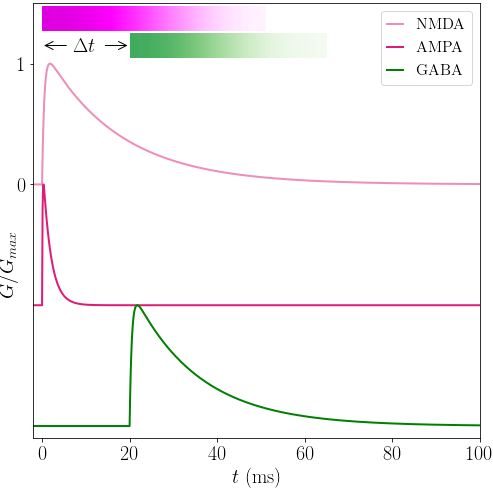

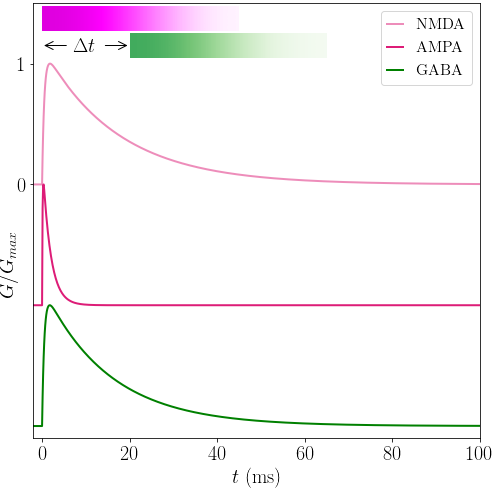

In [80]:
figure(figsize=(8,8))

xs = linspace(0,120,1000)

ton, toff = (0.5,17.0)
yglu = exp(-xs/toff)-exp(-xs/ton); yglu = yglu/max(yglu)
plot(concatenate(([-10],xs)),concatenate(([0],yglu)),'-',c=redcolor,linewidth= 2,alpha=0.5,label='NMDA')
ax = gca()
ax.set(autoscale_on=False)

gradient_bar(ax,[0],[1.27+.2],3*toff,1.27,cmap = newcmp)



ton, toff = (0.1,1.8)
trise = ton*toff/(ton-toff)*log(ton/toff)
print('AMPA',trise)
yglu = exp(-xs/toff)-exp(-xs/ton); yglu = yglu/max(yglu)
plot(concatenate(([-10],xs)),concatenate(([0],yglu))-1,'-',c=redcolor,linewidth= 2,label='AMPA')

ton, toff = (0.5,15.0)
trise = ton*toff/(ton-toff)*log(ton/toff)
print(trise)
ygaba = exp(-xs/toff)-exp(-xs/ton); ygaba= ygaba/max(ygaba)
plot(concatenate(([-10],xs+20)),concatenate(([0],ygaba))-1-1,'g-',linewidth= 2,label='GABA')
gradient_bar(ax,[20],[1.25],3*toff,1.05,cmap = cm.Greens_r)
ax.set_yticks(ticks=array([0,1.]))



ax.set_aspect('auto')

ax.set_xlim(-2,100)
ax.set_ylim(-2.1,1.5)
ax.set_xlabel('$t$ (ms)')
ax.set_ylabel('$G/G_{max}$')
ax.yaxis.set_label_coords(-0.03,0.4)
ax.legend()
ax.annotate('$\Delta t$',xy = (7,1.1))
ax.annotate('',xy = (6,1.15),xytext = (0,1.15),arrowprops=dict(arrowstyle="<-"))
ax.annotate('',xy = (14,1.15),xytext = (20,1.15),arrowprops=dict(arrowstyle="<-"))

savefig('conductances3.pdf')
figure(figsize=(8,8))

xs = linspace(0,120,1000)
ton, toff = (0.5,17.0)
yglu = exp(-xs/toff)-exp(-xs/ton); yglu = yglu/max(yglu)
plot(concatenate(([-10],xs)),concatenate(([0],yglu)),'-',c=redcolor,linewidth= 2,alpha=0.5,label='NMDA')
ax = gca()
ax.set(autoscale_on=False)


ton, toff = (0.1,1.8)
trise = ton*toff/(ton-toff)*log(ton/toff)
print('AMPA',trise)
yglu = exp(-xs/toff)-exp(-xs/ton); yglu = yglu/max(yglu)
plot(concatenate(([-10],xs)),concatenate(([0],yglu))-1,'-',c=redcolor,linewidth= 2,label='AMPA')

ton, toff = (0.5,15.0)
trise = ton*toff/(ton-toff)*log(ton/toff)
print(trise)
ygaba = exp(-xs/toff)-exp(-xs/ton); ygaba= ygaba/max(ygaba)
plot(concatenate(([-10],xs)),concatenate(([0],ygaba))-1-1,'g-',linewidth= 2,label='GABA')
gradient_bar(ax,[20],[1.25],3*toff,1.05,cmap = cm.Greens_r)
ax.set_yticks(ticks=array([0,1.]))

gradient_bar(ax,[0],[1.27+.2],3*toff,1.27,cmap = newcmp)


ax.set_aspect('auto')

ax.set_xlim(-2,100)
ax.set_ylim(-2.1,1.5)
ax.set_xlabel('$t$ (ms)')
ax.set_ylabel('$G/G_{max}$')
ax.yaxis.set_label_coords(-0.03,0.4)
ax.legend()
ax.annotate('$\Delta t$',xy = (7,1.1))
ax.annotate('',xy = (6,1.15),xytext = (0,1.15),arrowprops=dict(arrowstyle="<-"))
ax.annotate('',xy = (14,1.15),xytext = (20,1.15),arrowprops=dict(arrowstyle="<-"))

savefig('conductances2.pdf')

In [81]:

def plot_syninputsdelta(fig,ax):
    xs = linspace(0,120,1000)

    ton, toff = (0.5,17.0)
    yglu = exp(-xs/toff)-exp(-xs/ton); yglu = yglu/max(yglu)
    ax.plot(concatenate(([-10],xs)),concatenate(([0],yglu)),'-',c=redcolor,linewidth= 2,alpha=0.5,label='NMDA')
    ax.set(autoscale_on=False)

    dy = 0.05
    gradient_bar(ax,[0],[1.25+.2-dy],2*toff,1.25-dy,cmap = newcmp)



    ton, toff = (0.1,1.8)
    trise = ton*toff/(ton-toff)*log(ton/toff)
    yglu = exp(-xs/toff)-exp(-xs/ton); yglu = yglu/max(yglu)
    ax.plot(concatenate(([-10],xs)),concatenate(([0],yglu))-1.015,'-',c=redcolor,linewidth= 2,label='AMPA')

    ton, toff = (0.5,15.0)
    trise = ton*toff/(ton-toff)*log(ton/toff)
    ygaba = exp(-xs/toff)-exp(-xs/ton); ygaba= ygaba/max(ygaba)
    ax.plot(concatenate(([-10],xs+20)),concatenate(([0],ygaba))-1.015*2,'g-',linewidth= 2,label='GABA')
    gradient_bar(ax,[20],[1.23-dy],2*toff,1.03-dy,cmap = cm.Greens_r)
    ax.set_yticks(ticks=array([0,1.]))



    ax.set_aspect('auto')

    ax.set_xlim(-2,70)
    ax.set_ylim(-2.1,1.6)
    ax.set_xlabel('t (\si{\milli\second})')
    ax.set_ylabel('$\\textrm{G}/\\textrm{G}_{max}$',rotation=0, 
               horizontalalignment='left',
               verticalalignment='top')
    ax.yaxis.set_label_coords(0,1.05)
    ax.vlines(20,-1.015*2,1.03-dy,linestyle='--')
    #ax.legend(loc = (0.6,.885))
    ax.annotate('$\Delta \\t$',xy = (6.5,1.05-dy))
    ax.annotate('NMDA',xy = (50,0.1))
    ax.annotate('AMPA',xy = (50,-0.95))
    ax.annotate('GABA',xy = (50,-1.85))
    ax.annotate('',xy = (6,1.13-dy),xytext = (0,1.13-dy),arrowprops=dict(arrowstyle="<-"))
    ax.annotate('',xy = (14,1.13-dy),xytext = (20,1.13-dy),arrowprops=dict(arrowstyle="<-"))

In [82]:
#Jupyter notebook: Proper Spine Model - Inhibition.ipynb
data = {}

with open("../SpineModel/dis_baselinev2.pickle","rb") as f:
    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs = pickle.load(f)
data["dis_baseline"] = [vtracs,Ctracs]
with open("../SpineModel/dis_ga_glu05v2.pickle","rb") as f:
    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs = pickle.load(f)
data["dis_gaglu"] = [vtracs,Ctracs]
with open("../SpineModel/dis_glu_ga05v2.pickle","rb") as f:
    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs = pickle.load(f)
data["dis_gluga"] = [vtracs,Ctracs]
#with open("sis_ga_glu.pickle","rb") as f:
#    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs = pickle.load(f)
data["sis_gaglu"] = [vtracs,Ctracs]
#with open("sis_glu_ga.pickle","rb") as f:
#    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs = pickle.load(f)
data["sis_gluga"] = [vtracs,Ctracs]

with open("inhibition_v2.pickle","rb") as f:
    tdels,inhtimDis,_,tauDis,tauDis2,inhtimDism = pickle.load(f)

# Jupyter notebook: Proper Spine Model - Inhibition outside
with open("inhibition_v2_outPSD.pickle","rb") as f:
    tdels,inhtimSis,_,tauSis,tauSis2,inhtimSism = pickle.load(f)


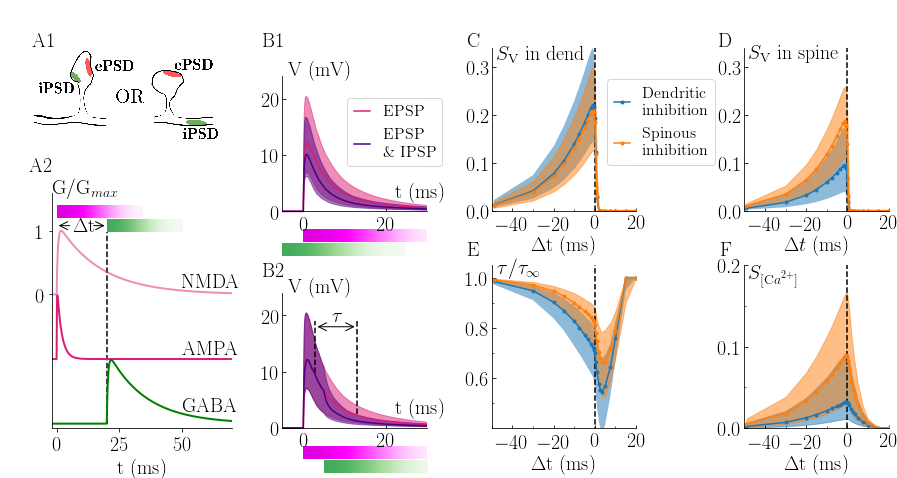

In [84]:
#height = im.size[1]
#im = np.array(im).astype(np.float) / 255
im = Image.open('../spine-inh_sketch_bothm.png')
height = im.size[1]
im = np.array(im).astype(np.float) / 255

fig = figure(figsize=(15,7.))
gs = mpl.gridspec.GridSpec(6,8,wspace=3, hspace=3) # 2x3 grid
ax0 = fig.add_subplot(gs[:2, :2]) # first full col
axl0 = fig.add_subplot(gs[2:, :2]) # first full col

ax1 = fig.add_subplot(gs[:3, 2:4]) # first row, second col
ax3 = fig.add_subplot(gs[3:, 2:4]) # 2nd row, second col

ax5 = fig.add_subplot(gs[:3, 4:6]) # first row, third col
ax0b = fig.add_subplot(gs[3:, 4:6]) # first full col
ax4 = fig.add_subplot(gs[3:, 6:]) # 2nd row, 3rd col
ax2 = fig.add_subplot(gs[:3, 6:]) # 2nd row, 3rd col

# Sketch
plot_syninputsdelta(fig,axl0)

ax0.imshow(im)
ax0.set_axis_off()

col_Inh = 'indigo'
col_ctr = redcolor

# Fig EPSP GABA-Glu dt = -5ms
vtracs = data["dis_baseline"][0]+70
plot_trace(vtracs,arange(vtracs.shape[0])*modeldt-100-20,ax1,c=col_ctr,band = bands)

vtracs = data["dis_gaglu"][0]+70
cG = col_Inh
plot_trace(vtracs,arange(vtracs.shape[0])*modeldt-100-20,ax1,c=cG,band = bands)
ax1.set_xlim(15-20,50-20)
#ax1.set_axis_off()

# Fig EPSP Glu-GABA dt = +5ms

vtracs = data["dis_baseline"][0]+70
#plot_trace(vtracs,arange(vtracs.shape[0])*.1-200+10,ax3,c='k')
#vtracs = data["dis_gaglu"][1]
plot_trace(vtracs,arange(vtracs.shape[0])*modeldt-100-20,ax3,c=col_ctr,band = bands,label='EPSP')

#vtracs = data["dis_baseline"][1]
#plot_trace(vtracs,arange(vtracs.shape[0])*.1-200+10,ax3,c='k')
vtracs = data["dis_gluga"][0]+70
plot_trace(vtracs,arange(vtracs.shape[0])*modeldt-100-20,ax3,c=cG,band = bands,label='EPSP \n\& IPSP')
ax3.set_xlim(15-20,50-20)
#ax1.set_ylim(-67,-20)
#ax3.set_axis_off()
#plot_trace(vtracsD,arange(vtracsD.shape[0])*.1-200+10,ax2,c='C1')
#plot_trace(vtracsS,arange(vtracsS.shape[0])*.1-200+10,ax2,c='C2')
#ax3.text(50,1,"$Ca^{2+}$")

vm,sl,sv = 1-inhtimSis[:,0],1-inhtimSis[:,1],1-inhtimSis[:,2]
ax2.plot(tdels,vm,'C0.-',label='Dendritic\n inhibition')
ax2.fill_between(tdels,sl,sv,alpha=0.5)

vm,sl,sv = 1-inhtimSis[:,3*5],1-inhtimSis[:,3*5+1],1-inhtimSis[:,3*5+2]
ax4.plot(tdels,vm,'C0.-',label='Dendritic\n inhibition')
ax4.fill_between(tdels,sl,sv,alpha=0.5,color='C0')
#ax2.set_axis_off()

vm,sl,sv = 1-inhtimDis[:,0],1-inhtimDis[:,1],1-inhtimDis[:,2]
ax2.plot(tdels,vm,'C1.-',label='Spinous\n inhibition')
ax2.fill_between(tdels,sl,sv,color='C1',alpha=0.5)

vm,sl,sv = 1-inhtimDis[:,3*5],1-inhtimDis[:,3*5+1],1-inhtimDis[:,3*5+2]
ax4.plot(tdels,vm,'C1.-',label='Spinous\n inhibition')
ax4.fill_between(tdels,sl,sv,color='C1',alpha=0.5)

vm,sl,sv = 1-inhtimSis[:,1*5],1-inhtimSis[:,1*5+1],1-inhtimSis[:,1*5+2]
ax5.plot(tdels,vm,'C0.-',label='Dendritic\n inhibition')
ax5.fill_between(tdels,sl,sv,alpha=0.5)

vm,sl,sv = 1-inhtimDis[:,1*5],1-inhtimDis[:,1*5+1],1-inhtimDis[:,1*5+2]
ax5.plot(tdels,vm,'C1.-',label='Spinous\n inhibition')
ax5.fill_between(tdels,sl,sv,color='C1',alpha=0.5)


#ax0btwin = ax0b.twinx()
#vm,sv = tauDis[:,2],tauDis[:,3]
#ax0btwin.plot(tdels,vm,'C1.-',label='In spine head')
##ax4twin.fill_between(tdels,vm+sv,vm-sv,color='C1',alpha=0.5)

#vm,sl,sv = tauSis[:,0],tauSis[:,1],tauSis[:,2]
#vm,sl,sv = tauSis2[:,0],tauSis2[:,1],tauSis2[:,2]
#vm,sl,sv = tauSis[:,5],tauSis[:,6],tauSis[:,7]
vm,sl,sv = tauSis2[:,15],tauSis2[:,16],tauSis2[:,17]
ax0b.plot(tdels,vm,'C0.-',label='Dendritic\n inhibition')
ax0b.fill_between(tdels,sl,sv,alpha=0.5)

#vm,sl,sv = tauDis[:,0],tauDis[:,1],tauDis[:,2]
#vm,sl,sv = tauDis2[:,0],tauDis2[:,1],tauDis2[:,2]
#vm,sl,sv = tauDis[:,5],tauDis[:,6],tauDis[:,7]
vm,sl,sv = tauDis2[:,15],tauDis2[:,16],tauDis2[:,17]
ax0b.plot(tdels,vm,'C1.-',label='Spinous\n inhibition')
ax0b.fill_between(tdels,sl,sv,color='C1',alpha=0.5)






ax2.spines['right'].set_color('none')
#ax2.spines['bottom'].set_color('none')
ax2.set_yticks(ticks=[0.0,0.1,0.2,0.3])
#ax2.set_xticks(ticks=arange(-50,70,20))
ax2.xaxis.set_minor_locator(FixedLocator(arange(-50,70,20)))
ax2.xaxis.set_major_locator(FixedLocator(arange(-40,60,20)))
ax2.tick_params(axis='x', pad = 10)
#ax2.yaxis.tick_right()
# Eliminate upper and right axes
ax2.spines['right'].set_position(('data',0.0))
ax2.spines['top'].set_position(('data',0.0))
#ax2.annotate('$V/V_{\\varnothing}$\n in spine',xy = (20,0.9))
ax2.spines['top'].set_color('none')
#ax2.xaxis.set_visible(False)
#ax2.set_ylim(.68,1.)


ax5.spines['right'].set_color('none')
#ax5.spines['bottom'].set_color('none')
ax5.spines['top'].set_color('none')
ax5.set_yticks(ticks=[0.0,0.1,0.20,0.3])
#ax2.set_xticks(ticks=arange(-50,70,20))
ax5.xaxis.set_minor_locator(FixedLocator(arange(-50,70,20)))
ax5.xaxis.set_major_locator(FixedLocator(arange(-40,60,20)))
ax5.tick_params(axis='x', pad = 10)
#ax5.yaxis.tick_right()
# Eliminate upper and right axes
#ax5.spines['right'].set_position(('data',0.0))
ax5.spines['top'].set_position(('data',0.0))
ax5.spines['top'].set_color('none')
#ax5.xaxis.set_visible(False)

ax4.spines['right'].set_color('none')
#ax4.spines['bottom'].set_color('none')
ax4.set_yticks(ticks=[0.0,0.1,0.2,0.3,0.4])
#ax4.set_xticks(ticks=[0])
ax4.yaxis.set_minor_locator(FixedLocator(arange(0.05,0.55,0.1)))
#ax4.xaxis.set_major_locator(FixedLocator(arange(-40,60,20)))

#ax4.yaxis.tick_right()
#ax4.xaxis.tick_top()

# Eliminate upper and right axes
#ax4.spines['right'].set_position(('data',0.0))
ax4.spines['bottom'].set_position(('data',0.00))
ax4.spines['top'].set_color('none')
#ax4.xaxis.set_visible(False)
#ax4.xaxis.tick_top()
ax4.set_ylabel('$S_{[{\\textrm Ca}^{2+}]}$',rotation = 0 , 
               horizontalalignment='left',
               verticalalignment='top')


ax0b.spines['top'].set_color('none')
ax0b.spines['right'].set_color('none')
#ax0b.spines['bottom'].set_color('none')
ax0b.yaxis.set_minor_locator(FixedLocator(arange(3,11,2)))
ax0b.yaxis.set_major_locator(FixedLocator(arange(4,12,2)))

#ax2.set_xticks(ticks=arange(-50,70,20))
#ax0b.tick_params(axis='x', pad = 10)
#ax0b.yaxis.tick_right()
#ax0b.xaxis.tick_top()
# Eliminate upper and right axes
#ax0b.spines['right'].set_position(('data',0.65))
#ax0b.spines['top'].set_color('none')
#ax0b.xaxis.set_visible(False)
ax0b.set_ylabel('$\\tau/\\tau_\infty$',rotation = 0 , 
               horizontalalignment='left',
               verticalalignment='top')


ax1.set(autoscale_on=False)
ax3.set(autoscale_on=False)
ax1.set(ylim=(-8,21),autoscale_on=False)
ax3.set(ylim=(-8,21),autoscale_on=False)
#ax1.plot(linspace(50,100),linspace(10,20)*0+2)

ddyg = 3
gradient_bar(ax1,[20-20],[-0.3-ddyg],17.*2,-2.5-ddyg,cmap = newcmp)
gradient_bar(ax1,[15-20],[-2.8-ddyg],15.*2,-5-ddyg,cmap = cm.Greens_r)

gradient_bar(ax3,[20-20],[-0.3-ddyg],17.*2,-2.5-ddyg,cmap = newcmp)
gradient_bar(ax3,[25-20],[-2.8-ddyg],15.*2,-5.0-ddyg,cmap = cm.Greens_r)

ax1.set_aspect('auto')
ax3.set_aspect('auto')
# scalebar(ax3,45,15,5,5,'$5$ ms','$5$ mV')
# scalebar(ax1,45,15,5,5,'$5$ ms','$5$ mV')

#gs.tight_layout(fig, rect=[.5,.5, 1, 1], h_pad=0.)#pad=0.4, w_pad=0.5, h_pad=4.0)
#print(xy1,sel)
#subplot_tool()

ax1.set_ylabel('$\\V$ (\si{\milli\\volt})',rotation = 0 , 
               horizontalalignment='left',
               verticalalignment='top')
ax3.set_ylabel('$\\V$ (\si{\milli\\volt})',rotation = 0 , 
               horizontalalignment='left',
               verticalalignment='top')
ax1.set_xlabel('$\\t$ (\si{\milli\second}) ')
ax3.set_xlabel('$\\t$ (\si{\milli\second}) ')



ax0b.set_xlabel('$\Delta \\t$ (\si{\milli\second}) ')
ax4.set_xlabel('$\Delta \\t$ (\si{\milli\second}) ')
ax5.set_xlabel('$\Delta \\t$ (\si{\milli\second}) ')
ax2.set_ylabel('$S_\\V$ in spine',rotation = 0 , 
               horizontalalignment='left',
               verticalalignment='top')
ax5.set_ylabel('$S_\\V$ in dend',rotation = 0 , 
               horizontalalignment='left',
               verticalalignment='top')

ax4.yaxis.set_label_coords(0.035,1.0)
ax0b.yaxis.set_label_coords(0.035,1.03)
ax2.yaxis.set_label_coords(0.035,1.)
ax5.yaxis.set_label_coords(0.035,1.)
ax1.yaxis.set_label_coords(0.035,1.2)
ax3.yaxis.set_label_coords(0.035,1.2)

ax4.xaxis.set_minor_locator(FixedLocator(arange(-50,70,20)))
ax4.xaxis.set_major_locator(FixedLocator(arange(-40,60,20)))
ax0b.xaxis.set_minor_locator(FixedLocator(arange(-50,70,20)))
ax0b.xaxis.set_major_locator(FixedLocator(arange(-40,60,20)))
ax0b.yaxis.set_major_locator(FixedLocator(arange(.6,1.2,.2)))
##ax0b.yaxis.set_minor_locator(FixedLocator(arange(4,14,4)))
ax0b.yaxis.set_minor_locator(FixedLocator(arange(.5,1.1,0.2)))

#
#ax2.set_xticklabels([])
#ax5.set_xticklabels([])
ax5.xaxis.set_label_coords(0.5,-0.15)
ax2.set_xlabel('$\Delta t$ (\si{\milli\second}) ')
ax2.xaxis.set_label_coords(0.5,-0.15)
ax2.tick_params(which='minor',direction='in')
ax2.tick_params(which='major',direction='in')
ax4.tick_params(which='minor',direction='in')
ax4.tick_params(which='major',direction='in')
ax5.tick_params(which='minor',direction='in')
ax5.tick_params(which='major',direction='in')
ax0b.tick_params(which='minor',direction='in')
ax0b.tick_params(which='major',direction='in')

ax3.tick_params(which='minor',direction='in')
ax3.tick_params(which='major',direction='in')
ax1.tick_params(which='minor',direction='in')
ax1.tick_params(which='major',direction='in')
ax2.tick_params(pad=2.5)
ax5.tick_params(pad=2.5)

ax0b.set_ylim(.5,1.05)

xl0,xlf = -50,20
ax0b.set_xlim(xl0,xlf)
ax5.set_xlim(xl0,xlf)
ax4.set_xlim(xl0,xlf)
ax2.set_xlim(xl0,xlf)
ax4.set_ylim(0.,0.2)

ax2.set_ylim(0.,.34)
ax5.set_ylim(0.,.34)
# ax1.annotate('$\Delta t=-5$ ms',xy = (30,7))
# ax3.annotate('$\Delta t=+5$ ms',xy = (35,7))
#ax0b.legend(loc = (-0.47,0.05))
ax2.legend(loc = (-0.95,0.28))

ax3.legend(loc=(0.45,1.88))

ax3.annotate("", xy=(2+1,20-2), xytext=(2+11,20-2),
    arrowprops=dict(arrowstyle="<->"))

#ax3.arrow(50+22,.9*exp(-1.0),60,0.,head_width=0.2,head_length=20)

#ax3.vlines(20+3,0.1,18,linestyle='--')
ax3.vlines(2+1,9.76,19,linestyle='--')
ax3.vlines(2+11,2.44,19,linestyle='--')

ax3.annotate('$\\tau$',xy = (27-20,21-2))

ax1.annotate('DiS: $V_{\\rm spine}$',xy = (40,35))

ax0b.set_ylim(0.4,1.05)


xst = linspace(0,200,2000)
biexp = exp(-xs/10.0)-exp(-xs/1.3)
biexp = biexp/max(biexp)
#ax1.plot(xs+20,biexp*25,'--',linewidth=2)


# bboxor = ax3.figbox._points
# dy = bboxor[0,1]*0.48
# bboxn = [[bboxor[0,0],bboxor[0,1]-dy],[bboxor[1,0],bboxor[1,1]-dy*.5]]
# ax3.set_position(Bbox(bboxn))

# bboxor = ax1.figbox._points
# bboxn = [[bboxor[0,0],bboxor[0,1]-dy],[bboxor[1,0],bboxor[1,1]-dy*.5]]
# ax1.set_position(Bbox(bboxn))
bboxor = ax3.figbox._points
dy = bboxor[1,1]-bboxor[0,1]
fac = 0.275
bboxn = [[bboxor[0,0],bboxor[0,1]-dy*fac],[bboxor[1,0],bboxor[1,1]-dy*fac]]
ax3.set_position(Bbox(bboxn))

bboxor = ax1.figbox._points
fac = 0.28
bboxn = [[bboxor[0,0],bboxor[0,1]-dy*fac],[bboxor[1,0],bboxor[1,1]-dy*fac]]
ax1.set_position(Bbox(bboxn))

bboxor = ax0.figbox._points
dy =  bboxor[1,1]-bboxor[0,1]
dx = bboxor[1,0]-bboxor[0,0]
bboxn = [[bboxor[0,0]+dx*0.15,bboxor[0,1]]-dy*.2,[bboxor[1,0]+dx*0.15,bboxor[1,1]+dy*.15]]
# bboxn = [[bboxor[0,0],bboxor[0,1]-dy],[bboxor[1,0],bboxor[1,1]-dy]]
ax0.set_position(Bbox(bboxn))


axl0.spines['top'].set_color('none')
axl0.spines['right'].set_color('none')
bboxor = axl0.figbox._points
dy =  bboxor[1,1]-bboxor[0,1]
dx = bboxor[1,0]-bboxor[0,0]
bboxn = [[bboxor[0,0],bboxor[0,1]],[bboxor[1,0]+dx*.25,bboxor[1,1]]]
axl0.set_position(Bbox(bboxn))


bboxor = ax5.figbox._points
dy =  bboxor[1,1]-bboxor[0,1]
dx = bboxor[1,0]-bboxor[0,0]
bboxn = [[bboxor[0,0]-dx*.15,bboxor[0,1]],[bboxor[1,0]-dx*.15,bboxor[1,1]]]
ax5.set_position(Bbox(bboxn))

bboxor = ax0b.figbox._points
dy =  bboxor[1,1]-bboxor[0,1]
dx = bboxor[1,0]-bboxor[0,0]
bboxn = [[bboxor[0,0]-dx*.15,bboxor[0,1]],[bboxor[1,0]-dx*.15,bboxor[1,1]]]
ax0b.set_position(Bbox(bboxn))

# ax3.tick_params(axis='x', which='major', pad=27)
# ax1.tick_params(axis='x', which='major', pad=27)


ax1.spines['top'].set_color('none')
ax1.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['right'].set_color('none')
ax1.spines['bottom'].set_position(('data',0.00))
ax3.spines['bottom'].set_position(('data',0.00))
ax3.spines['left'].set_bounds(0.0,24)
ax1.spines['left'].set_bounds(0.0,24)

ax5.vlines(0,0.0,0.35,linestyle='--')
ax2.vlines(0,0.0,0.35,linestyle='--')
ax0b.vlines(0,0.0,1.2,linestyle='--')
ax4.vlines(0,0.0,0.2,linestyle='--')

ax1.xaxis.set_label_coords(0.95,0.455)
ax3.xaxis.set_label_coords(0.95,0.455)

axs = [ax0,ax1,ax5,ax2,ax0b,ax4,axl0,ax3]
pos = zeros((len(axs),2))
pos[:,1] = 1-pos[:,1]
pos[1:,1] = 1.10
pos[1:,0] = -0.08
pos[4:,1] = 1.15

pos[0,0] = 0.11
pos[0,1] = 1.22
pos[1,1] = 1.38

pos[-2,0] = 0.0
pos[-1,0] = 0.02
pos[1,0] = 0.02
pos[-1,1] = 1.3

numbering_panels(axs,pos,labels=['A1','B1','C','D','E','F','A2','B2'])


savefig('f2v2.png',dpi = 300,tight_layout = True)
#savefig('f2x2.pdf',dpi = 300,tight_layout = True)


In [ ]:
ax3.spines['left'].set_position

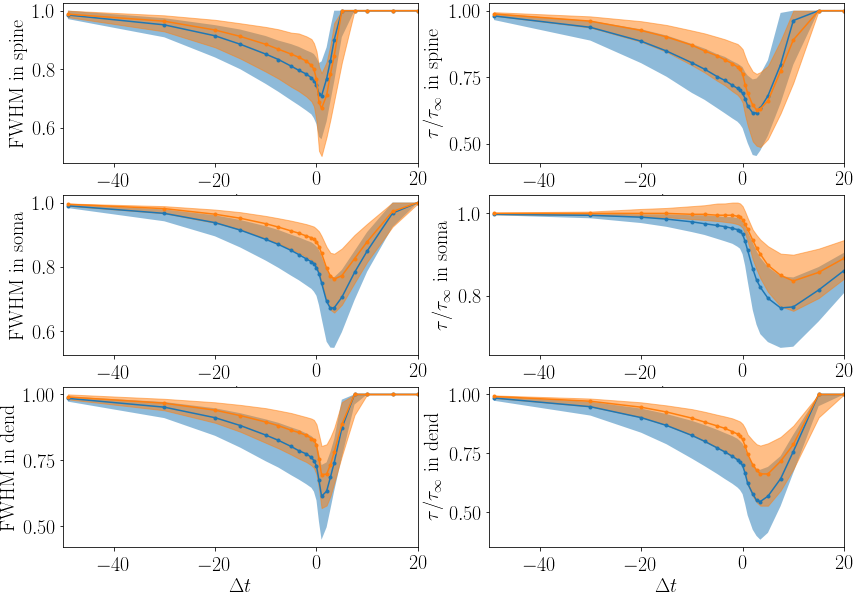

In [260]:
fig,ax = subplots(3,2,figsize= (14,10))
labels = ['spine','soma','dend']
for i in range(3):
    label = labels[i]
    j = i
    if j==2: j=3
    vm,sl,sv = tauSis[:,j*5],tauSis[:,j*5+1],tauSis[:,j*5+2]
    ax[i,0].plot(tdels,vm,'C0.-',label='Axo-dendritic\n inhibition')
    ax[i,0].fill_between(tdels,sl,sv,alpha=0.5)

    #vm,sl,sv = tauDis[:,0],tauDis[:,1],tauDis[:,2]
    vm,sl,sv = tauDis[:,j*5],tauDis[:,j*5+1],tauDis[:,j*5+2]
    ax[i,0].plot(tdels,vm,'C1.-',label='Axo-spinous\n inhibition')
    ax[i,0].fill_between(tdels,sl,sv,color='C1',alpha=0.5)
    ax[i,0].set_xlabel('$\Delta t$')
    ax[i,0].set_ylabel('FWHM in '+label)
    
    vm,sl,sv = tauSis2[:,j*5],tauSis2[:,j*5+1],tauSis2[:,j*5+2]
    ax[i,1].plot(tdels,vm,'C0.-',label='Axo-dendritic\n inhibition')
    ax[i,1].fill_between(tdels,sl,sv,alpha=0.5)

    #vm,sl,sv = tauDis[:,0],tauDis[:,1],tauDis[:,2]
    vm,sl,sv = tauDis2[:,j*5],tauDis2[:,j*5+1],tauDis2[:,j*5+2]
    ax[i,1].plot(tdels,vm,'C1.-',label='Axo-spinous\n inhibition')
    ax[i,1].fill_between(tdels,sl,sv,color='C1',alpha=0.5)
    ax[i,1].set_xlabel('$\Delta t$')
    ax[i,1].set_ylabel('$\\tau$/$\\tau_\infty$ in '+label)
    ax[i,0].set_xlim(xl0,xlf)
    ax[i,1].set_xlim(xl0,xlf)

fig.savefig('times.png',dpi= 300)

In [17]:
#From notebook: Proper Spine Model - Gating info 2
#with open("gatinginfo_0_temp.pickle","rb") as f:
#    fapS,fapD,fap0,fapC = pickle.load(f)
#with open("gatinginfo_u.pickle","rb") as f:
#    fapSu,fapDu,fap0u,fapCu = pickle.load(f)
with open("gatinginfov2_temp.pickle","rb") as f:
    #with open("gatinginfo_f_bRx2.pickle","rb") as f:
    fapSf,fapDf,fap0f,fapCf,fdatf = pickle.load(f)
#with open("gatinginfo_h.pickle","rb") as f:
#    fapSh,fapDh,fap0h,fapCh,fdath = pickle.load(f)

#From notebook: Electrotonic Figures + Proper Spine Model - Gaing Info2 - Electrotonic revisited
with open("gatinginfo_lengthv2.pickle","rb") as f:
    shle,shleh,shle0,shleh0  = pickle.load(f)
    

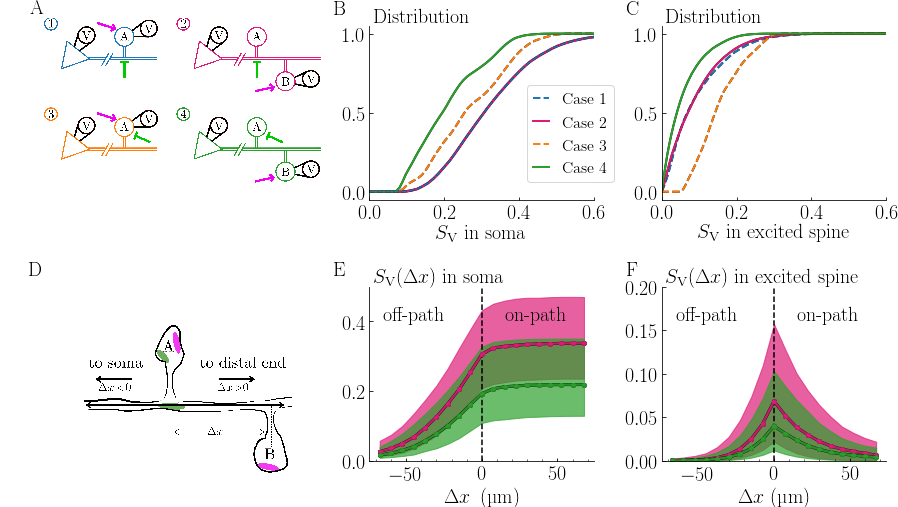

In [58]:
im = Image.open('../dendintem2.png')
im2 = Image.open('../legend2.png')

fig = figure(figsize=(14.5,8))
gs = mpl.gridspec.GridSpec(2, 3,  wspace=0.3, hspace=0.5) # 2x3 grid
ax0 = fig.add_subplot(gs[:, 0]) # first full col
#axl0 = fig.add_subplot(gs[1, 0]) # first full col

ax2 = fig.add_subplot(gs[0, 1]) # first row, second col
ax1 = fig.add_subplot(gs[0, 2]) # first row, third col
ax4 = fig.add_subplot(gs[1, 1]) # 2nd row, second col
ax3 = fig.add_subplot(gs[1, 2]) # 2nd row, 3rd col
#axl1 = fig.add_subplot(gs[1, 0]) # lower row, 1st col

color = redcolor
xt = -arange(0,10)*7.5
#axl1.fill_between(xt,mt-mts,mt+mts,alpha=0.9,color=color)
#axl1.plot(xt,mt,'k.-',linewidth=2)
#axl1.plot(xt,mt,color+'.-',label='Excitatory EPSP\n $V_{max}(\Delta x)/V_{max}(0)$',linewidth=2)
#axl1.fill_between(-xt,mtn-mtsn,mtn+mtsn,color=color,alpha=0.9)
#axl1.plot(-xt,mtn,'k.-',linewidth=2)
#axl1.plot(-xt,mtn,color+'.-',linewidth=2)

axsp = 1
lab = 'Vspine'
color = 'C2'
#axl1.plot(shleh0[lab][:,0],shleh0[lab][:,1+axsp*5],'k.-')
#axl1.plot(shleh0[lab][:,0],shleh0[lab][:,1+axsp*5],color+'.-',label='Axo-spinous inhibitory shunt\n $SL(\Delta x)/SL(0)$')
#axl1.fill_between(shleh0[lab][:,0],shleh0[lab][:,2+axsp*5],shleh0[lab][:,3+axsp*5],color=color,alpha=0.7)
#axl1.set_ylim(0,1.05)
#axl1.spines['left'].set_position(('data',0.0))
#axl1.spines['top'].set_color('none')
#axl1.spines['right'].set_color('none')
#axl1.set_xlabel('$\Delta x\, (\mu m)$')

ax0.imshow(im)
ax0.set_axis_off()
#axl0.imshow(im2)
#axl0.set_axis_off()

#h2 = ax2.hist(fapSf[:,1]/fapSf[:,0],51,alpha=0.7,label='A-D',color = 'C0',density=True)
#ht = ax2.hist(fapSf[:,2]/fapSf[:,0],51,label='A-S',color = 'C1',density=True,alpha=0.7)
h2 = histogram(1-fapSf[:,1]/fapSf[:,0],51)
ht = histogram(1-fapSf[:,2]/fapSf[:,0],51)
ht2 = histogram(1-fapSf[:,5]/fapSf[:,3],51)
ht3 = histogram(1-fapSf[:,4]/fapSf[:,3],51)

myl = max([h2[0].max(),ht[0].max()])

mxl = (min(h2[1].min(),ht[1].min()),max(h2[1].max(),ht[1].max()))
myl = 1.0

color0 = redcolor # red
htx = h2[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(h2[0])/sum(h2[0])
#htx = concatenate(([mxl[0]],htx,[1.0]))
htx = concatenate(([0],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
ax2.plot(htx,hty*myl,'k',linewidth=2.4)
ax2.plot(htx,hty*myl,color0,linewidth=2.4)

color0b = 'C1' # orange
htx = ht2[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(ht2[0])/sum(ht2[0])
#htx = concatenate(([mxl[0]],htx,[1.0]))
htx = concatenate(([0],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
ax2.plot(htx,hty*myl,'k--',linewidth=2)
ax2.plot(htx,hty*myl,'--',c=color0b,linewidth=2)

color = 'C2' # green
htx = ht[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(ht[0])/sum(ht[0])
#htx = concatenate(([mxl[0]],htx,[1.0]))
htx = concatenate(([0],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
ax2.plot(htx,hty*myl,'k',linewidth=2)
ax2.plot(htx,hty*myl,color,linewidth=2)

color2= 'C0' # blue
htx = ht3[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(ht3[0])/sum(ht3[0])
#htx = concatenate(([mxl[0]],htx,[1.0]))
htx = concatenate(([0],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
ax2.plot(htx,hty*myl,'k--',linewidth=1.5)
ax2.plot(htx,hty*myl,'--',c=color2,linewidth=1.5)
ax2.spines['top'].set_color('none')
ax2.spines['right'].set_color('none')

#h2 = ax1.hist(fap0f[:,1]/fap0f[:,0],51,alpha=0.7,label='A-D',color = 'C0',density=True)
#ht = ax1.hist(fap0f[:,2]/fap0f[:,0],51,label='A-S',color = 'C1',density=True,alpha=0.7)
h2 = histogram(1-fap0f[:,1]/fap0f[:,0],51)
ht = histogram(1-fap0f[:,2]/fap0f[:,0],51)
ht2 = histogram(1-fap0f[:,5]/fap0f[:,3],51)
ht3 = histogram(1-fap0f[:,4]/fap0f[:,3],51)

myl = max([h2[0].max(),ht[0].max()])
mxl = (min(h2[1].min(),ht[1].min()),max(h2[1].max(),ht[1].max()))
myl = 1.0

case1 = 'Axo-dendritic inhibition,\nEPSP in spine A'
case1 = 'Case 1'
htx = ht3[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(ht3[0])/sum(ht3[0])
#htx = concatenate(([mxl[0]],htx,[1.0]))
htx = concatenate(([0],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
ax1.plot(htx,hty*myl,'k--',linewidth=2)
ax1.plot(htx,hty*myl,'--',c=color2,linewidth=2,label=case1)

case2 = 'Axo-dendritic inhibition,\nEPSP in spine B'
case2 = 'Case 2'
htx = h2[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(h2[0])/sum(h2[0])
#htx = concatenate(([mxl[0]],htx,[1.0]))
htx = concatenate(([0],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
ax1.plot(htx,hty*myl,'k',linewidth=2)
ax1.plot(htx,hty*myl,color0,linewidth=2,label=case2)

case3 = 'Axo-spinous inhibition,\nEPSP in spine A'
case3 = 'Case 3'
htx = ht2[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(ht2[0])/sum(ht2[0])
#htx = concatenate(([mxl[0]],htx,[1.0]))
htx = concatenate(([0],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
ax1.plot(htx,hty*myl,'k--',linewidth=2)
ax1.plot(htx,hty*myl,'--',c=color0b,linewidth=2,label=case3)

case4 = 'Axo-spinous inhibition,\nEPSP in spine B'
case4 = 'Case 4'
htx = ht[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(ht[0])/sum(ht[0])
#htx = concatenate(([mxl[0]],htx,[1.0]))
htx = concatenate(([0],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
ax1.plot(htx,hty*myl,'k',linewidth=2)
ax1.plot(htx,hty*myl,color,linewidth=2,label=case4)
ax1.spines['top'].set_color('none')
ax1.spines['right'].set_color('none')

axss = [ax3,ax4]
axsp = 0
# ['Vspine','Vsoma','Vdendrite']
for i,lab in enumerate(['Vspine','Vsoma']):
    axss[i].plot(shle[lab][:,0],shle[lab][:,1+axsp*5],'k.-',linewidth=3,markersize=8)
    axss[i].plot(shle[lab][:,0],shle[lab][:,1+axsp*5],'.-',c=color0,linewidth=2.5,label='Axo-dendritic\n inhibition',markersize=8,alpha=0.9)
    axss[i].fill_between(shle[lab][:,0],shle[lab][:,2+axsp*5],shle[lab][:,3+axsp*5],alpha=0.7,color = color0)
# ax4.spines['left'].set_position(('data',0.0))
ax4.spines['top'].set_color('none')
ax4.spines['right'].set_color('none')
#ax4.set_ylabel('Shunting Level')
ax4.set_xlabel('$\Delta x\,$ (\si{\micro\meter})')
#ax4.legend()

axsp = 1
for i,lab in enumerate(['Vspine','Vsoma']):
    axss[i].plot(shle[lab][:,0],shle[lab][:,1+axsp*5],'k.-',linewidth=3,markersize=8)
    axss[i].plot(shle[lab][:,0],shle[lab][:,1+axsp*5],color+'.-',linewidth=2.5,label='Axo-spinous\n inhibition',markersize=8,alpha=0.9)
    axss[i].fill_between(shle[lab][:,0],shle[lab][:,2+axsp*5],shle[lab][:,3+axsp*5],alpha=0.7,color=color)




ax1.set_xlim(0,1)
ax1.set_ylabel('Distribution',rotation = 0 , 
               horizontalalignment='left',
               verticalalignment='top')
ax1.set_xlabel('$S_\\V$ in excited spine')

ax2.set_xlim(0.,0.6)
ax1.set_xlim(0.,0.6)

ax2.set_xlabel('$S_\\V$ in soma')
ax2.set_ylabel('Distribution',rotation = 0 , 
               horizontalalignment='left',
               verticalalignment='top')
#ax1.annotate('Neighboring spine\n ($\Delta x\\approx0.7 \mu m$)',xy = (0.17,0.2))

ax2.tick_params(which='major',direction='in')
ax4.tick_params(which='major',direction='in')
#ax3.tick_params(which='major',direction='in')
ax1.tick_params(which='major',direction='in')
#axl1.tick_params(which='major',direction='in')
ax3.tick_params(which='major',direction='in')

# ax3.spines['left'].set_position(('data',0.0))
ax3.spines['top'].set_color('none')
ax3.spines['right'].set_color('none')
ax3.set_xlabel('$\Delta x$ (\si{\micro\meter})')
yloc_offonpath = 0.21 
ax3.annotate('off-path',xy = (-65,0.16))
ax3.annotate('on-path',xy = (15,0.16))
#ax4.set_ylabel('$(V_{\sf max, \infty}-V_{\sf max})/V_{\sf max, \infty}$',rotation=0)
ax4.set_ylabel('$S_\\V(\Delta x)$ in soma',rotation = 0 , 
               horizontalalignment='left',
               verticalalignment='top')
ax4.yaxis.set_label_coords(0.5,1.03)
#ax3.set_ylabel('$(V_{\sf max, \infty}-V_{\sf max})/V_{\sf max, \infty}$',rotation=0)
ax3.set_ylabel('$S_\\V(\Delta x)$ in excited spine',rotation = 0 , 
               horizontalalignment='left',
               verticalalignment='top')
ax3.yaxis.set_label_coords(0.5,1.03)
ax4.set_ylim(0,0.3)
ax3.set_ylim(0,0.3)
ax4.annotate('off-path',xy = (-65,0.4))
ax4.annotate('on-path',xy = (15,0.4))

axl1.xaxis.set_minor_locator(FixedLocator(arange(-100,100,10)))
ax3.xaxis.set_minor_locator(FixedLocator(arange(-100,100,10)))
axl1.tick_params(which='minor',direction='in')
ax3.tick_params(which='minor',direction='in')
ax4.xaxis.set_minor_locator(FixedLocator(arange(-100,100,10)))
ax4.tick_params(which='minor',direction='in')

#ax3.legend(loc = (-0.28,0.4))
#axl1.legend(loc = (0.,1.07),frameon=False)
ax1.legend(loc=(-0.6,0.1))


ax2.yaxis.set_label_coords(0.02,1.1)
ax1.yaxis.set_label_coords(0.02,1.1)
ax4.yaxis.set_label_coords(0.02,1.1)
ax3.yaxis.set_label_coords(0.02,1.1)

# temp = 1-fapSf[:,5]/fapSf[:,3]
# temp.sort()
# sh = temp.shape[0]
# nmed = sh//2
# nl1, nv1 = int(sh*0.16),int(sh*(1-0.16))
# yerr = abs(array([[temp[nl1]],[temp[nv1]]])-temp[nmed])
# ax4.errorbar(0.0,temp[nmed],yerr,fmt='.',zorder=4,capsize=4,color=color0b,elinewidth=2,barsabove=True,markersize=9)
# temp = 1-fap0f[:,5]/fap0f[:,3]
# temp.sort()
# sh = temp.shape[0]
# nmed = sh//2
# nl1, nv1 = int(sh*0.16),int(sh*(1-0.16))
# yerr = abs(array([[temp[nl1]],[temp[nv1]]])-temp[nmed])
# #ax3.errorbar(0.0,temp[nmed],yerr,fmt='.',zorder=4,capsize=4,color=color0b,elinewidth=2,barsabove=True,markersize=9)
# ax3.errorbar(0.0,temp[nmed],yerr,fmt='.',zorder=4,capsize=4,color=color0b,elinewidth=2,barsabove=True,markersize=9)

ax4.vlines(0.0,0.,0.5,linestyle='--')
ax3.vlines(0.0,0.,0.2,linestyle='--')

bboxor = ax0.figbox._points
dy =  bboxor[1,1]-bboxor[0,1]
dx = bboxor[1,0]-bboxor[0,0]
bboxn = [[bboxor[0,0]-0.15*dx,bboxor[0,1]-0.2*dx],[bboxor[1,0]+dx*.08,bboxor[1,1]+0.15*dx]]
# bboxn = [[bboxor[0,0],bboxor[0,1]-dy],[bboxor[1,0],bboxor[1,1]-dy]]
ax0.set_position(Bbox(bboxn))

# bboxor = axl0.figbox._points
# dy =  bboxor[1,1]-bboxor[0,1]
# dx = bboxor[1,0]-bboxor[0,0]
# bboxn = [[bboxor[0,0]-0.45*dx,bboxor[0,1]-0.2*dx],[bboxor[1,0]+dx*.1,bboxor[1,1]+1.75*dx]]
# # bboxn = [[bboxor[0,0],bboxor[0,1]-dy],[bboxor[1,0],bboxor[1,1]-dy]]
# axl0.set_position(Bbox(bboxn))

# axl0.spines['top'].set_color('none')
# axl0.spines['right'].set_color('none')
# bboxor = axl0.figbox._points
# dy =  bboxor[1,1]-bboxor[0,1]
# dx = bboxor[1,0]-bboxor[0,0]
# bboxn = [[bboxor[0,0],bboxor[0,1]],[bboxor[1,0]+dx*.20,bboxor[1,1]+dy*.6]]


#axl0.set_position(Bbox(bboxn))

axs = [ax0,ax2,ax1,ax4,ax3,ax0]

ax4.set_ylim(0.,0.5)
ax3.set_ylim(0.,0.2)

pos = zeros((len(axs),2))
pos[:,1] = 1-pos[:,1]

pos[:,:] = (-0.1,1.15)

pos[0,:] = (0.0,1.04)
pos[3,:] = (-0.1,1.15)
pos[-1,:] = (0.0,0.47)
numbering_panels(axs,pos,labels=['A','B','C','E','F','D'])

savefig('f3v2.png',dpi = 300,tight_layout = True)


In [33]:
bboxn

[[-0.9778450314615076, -0.7653977492313195],
 [0.8947780825364516, 1.8759033283439555]]

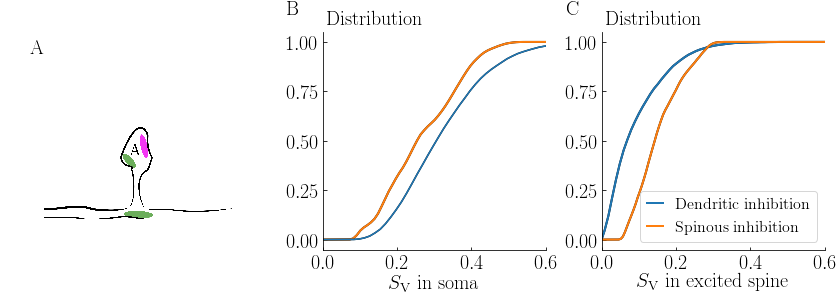

In [20]:
im = Image.open('../dendintelonly1.png')

fig = figure(figsize=(14,4))
gs = mpl.gridspec.GridSpec(1, 3,  wspace=0.25, hspace=0.47) # 2x3 grid
ax0 = fig.add_subplot(gs[:, 0]) # first full col
ax2 = fig.add_subplot(gs[:, 1]) # first row, second col
ax1 = fig.add_subplot(gs[:, 2]) # first row, third col
#axl1 = fig.add_subplot(gs[1, 0]) # lower row, 1st col

color = redcolor
xt = -arange(0,10)*7.5
#axl1.fill_between(xt,mt-mts,mt+mts,alpha=0.9,color=color)
#axl1.plot(xt,mt,'k.-',linewidth=2)
#axl1.plot(xt,mt,color+'.-',label='Excitatory EPSP\n $V_{max}(\Delta x)/V_{max}(0)$',linewidth=2)
#axl1.fill_between(-xt,mtn-mtsn,mtn+mtsn,color=color,alpha=0.9)
#axl1.plot(-xt,mtn,'k.-',linewidth=2)
#axl1.plot(-xt,mtn,color+'.-',linewidth=2)

axsp = 1
lab = 'Vspine'
color = 'C2'
#axl1.plot(shleh0[lab][:,0],shleh0[lab][:,1+axsp*5],'k.-')
#axl1.plot(shleh0[lab][:,0],shleh0[lab][:,1+axsp*5],color+'.-',label='Axo-spinous inhibitory shunt\n $SL(\Delta x)/SL(0)$')
#axl1.fill_between(shleh0[lab][:,0],shleh0[lab][:,2+axsp*5],shleh0[lab][:,3+axsp*5],color=color,alpha=0.7)
#axl1.set_ylim(0,1.05)
#axl1.spines['left'].set_position(('data',0.0))
#axl1.spines['top'].set_color('none')
#axl1.spines['right'].set_color('none')
#axl1.set_xlabel('$\Delta x\, (\mu m)$')

ax0.imshow(im)
ax0.set_axis_off()

#h2 = ax2.hist(fapSf[:,1]/fapSf[:,0],51,alpha=0.7,label='A-D',color = 'C0',density=True)
#ht = ax2.hist(fapSf[:,2]/fapSf[:,0],51,label='A-S',color = 'C1',density=True,alpha=0.7)
h2 = histogram(1-fapSf[:,1]/fapSf[:,0],51)
ht = histogram(1-fapSf[:,2]/fapSf[:,0],51)
ht2 = histogram(1-fapSf[:,5]/fapSf[:,3],51)
ht3 = histogram(1-fapSf[:,4]/fapSf[:,3],51)

myl = max([h2[0].max(),ht[0].max()])

mxl = (min(h2[1].min(),ht[1].min()),max(h2[1].max(),ht[1].max()))
myl = 1.0

color0b = 'C1' # orange
htx = ht2[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(ht2[0])/sum(ht2[0])
#htx = concatenate(([mxl[0]],htx,[1.0]))
htx = concatenate(([0],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
ax2.plot(htx,hty*myl,'k',linewidth=2)
ax2.plot(htx,hty*myl,color0b,linewidth=2)

color2= 'C0' # blue
htx = ht3[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(ht3[0])/sum(ht3[0])
#htx = concatenate(([mxl[0]],htx,[1.0]))
htx = concatenate(([0],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
ax2.plot(htx,hty*myl,'k',linewidth=1.5)
ax2.plot(htx,hty*myl,color2,linewidth=1.5)
ax2.spines['top'].set_color('none')
ax2.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.spines['right'].set_color('none')
#h2 = ax1.hist(fap0f[:,1]/fap0f[:,0],51,alpha=0.7,label='A-D',color = 'C0',density=True)
#ht = ax1.hist(fap0f[:,2]/fap0f[:,0],51,label='A-S',color = 'C1',density=True,alpha=0.7)
h2 = histogram(1-fap0f[:,1]/fap0f[:,0],51)
ht = histogram(1-fap0f[:,2]/fap0f[:,0],51)
ht2 = histogram(1-fap0f[:,5]/fap0f[:,3],51)
ht3 = histogram(1-fap0f[:,4]/fap0f[:,3],51)

myl = max([h2[0].max(),ht[0].max()])
mxl = (min(h2[1].min(),ht[1].min()),max(h2[1].max(),ht[1].max()))
myl = 1.0


htx = ht3[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(ht3[0])/sum(ht3[0])
#htx = concatenate(([mxl[0]],htx,[1.0]))
htx = concatenate(([0],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
ax1.plot(htx,hty*myl,'k',linewidth=2)
ax1.plot(htx,hty*myl,color2,linewidth=2,label='Dendritic inhibition')


htx = ht2[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(ht2[0])/sum(ht2[0])
#htx = concatenate(([mxl[0]],htx,[1.0]))
htx = concatenate(([0],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
ax1.plot(htx,hty*myl,'k',linewidth=2)
ax1.plot(htx,hty*myl,color0b,linewidth=2,label='Spinous inhibition')




ax1.set_xlim(0,1)
ax1.set_ylabel('Distribution',rotation = 0 , 
               horizontalalignment='left',
               verticalalignment='top')
ax1.set_xlabel('$S_\\V$ in excited spine')

ax2.set_xlim(0.,0.6)
ax1.set_xlim(0.,0.6)

ax2.set_xlabel('$S_\\V$ in soma')
ax2.set_ylabel('Distribution',rotation = 0 , 
               horizontalalignment='left',
               verticalalignment='top')
#ax1.annotate('Neighboring spine\n ($\Delta x\\approx0.7 \mu m$)',xy = (0.17,0.2))

ax2.tick_params(which='major',direction='in')
#ax3.tick_params(which='major',direction='in')
ax1.tick_params(which='major',direction='in')
#axl1.tick_params(which='major',direction='in')

ax1.legend()


ax2.yaxis.set_label_coords(0.02,1.1)
ax1.yaxis.set_label_coords(0.02,1.1)
ax4.yaxis.set_label_coords(0.02,1.1)
ax3.yaxis.set_label_coords(0.02,1.1)

# temp = 1-fapSf[:,5]/fapSf[:,3]
# temp.sort()
# sh = temp.shape[0]
# nmed = sh//2
# nl1, nv1 = int(sh*0.16),int(sh*(1-0.16))
# yerr = abs(array([[temp[nl1]],[temp[nv1]]])-temp[nmed])
# ax4.errorbar(0.0,temp[nmed],yerr,fmt='.',zorder=4,capsize=4,color=color0b,elinewidth=2,barsabove=True,markersize=9)
# temp = 1-fap0f[:,5]/fap0f[:,3]
# temp.sort()
# sh = temp.shape[0]
# nmed = sh//2
# nl1, nv1 = int(sh*0.16),int(sh*(1-0.16))
# yerr = abs(array([[temp[nl1]],[temp[nv1]]])-temp[nmed])
# #ax3.errorbar(0.0,temp[nmed],yerr,fmt='.',zorder=4,capsize=4,color=color0b,elinewidth=2,barsabove=True,markersize=9)
# ax3.errorbar(0.0,temp[nmed],yerr,fmt='.',zorder=4,capsize=4,color=color0b,elinewidth=2,barsabove=True,markersize=9)

axs = [ax0,ax2,ax1,ax4,ax3]

ax4.set_ylim(0.,0.5)
ax3.set_ylim(0.,0.2)

pos = zeros((len(axs),2))
pos[:,1] = 1-pos[:,1]

pos[:,:] = (-0.1,1.15)

pos[0,:] = (0.,1.15)
pos[3,:] = (0.,1.15)
numbering_panels(axs,pos)

savefig('f3v2Ant.png',dpi = 300,tight_layout = True)

In [124]:
ytASspA = 1-fapCf[:,5]/fapCf[:,3]
ytADspA = 1-fapCf[:,4]/fapCf[:,3]
print(ytADspA.mean(),(1.-ytASspA/ytADspA).max())

0.10822582732385272 0.8094561696335445


In [133]:
print('spine A - AS')
ytASspA = 1.-fapCf[:,5]/fapCf[:,3]
print('maximal C attenuation',ytASspA.mean())
ytASspA = 1.-fap0f[:,5]/fap0f[:,3]
print('maximal V in sp attenuation',ytASspA.mean())
ytASspA = 1.-fapSf[:,5]/fapSf[:,3]
print('maximal V in soma attenuation',ytASspA.mean())
ytASspA = 1.-fapDf[:,5]/fapDf[:,3]
print('maximal V in dend attenuation',ytASspA.mean())

print('spine B - AS')
#ytASspB = 1.-fapCf[:,2]/fapCf[:,0]
#print('maximal C attenuation',ytASspB.mean())
ytASspB = 1.-fap0f[:,2]/fap0f[:,0]
print('maximal V in sp attenuation',ytASspB.mean())
ytASspB = 1.-fapSf[:,2]/fapSf[:,0]
print('maximal V in soma attenuation',ytASspB.mean())
ytASspB = 1.-fapDf[:,2]/fapDf[:,0]
print('maximal V in dend attenuation',ytASspB.mean())

spine A - AS
maximal C attenuation 0.11818849207541315
maximal V in sp attenuation 0.15637114547978598
maximal V in soma attenuation 0.2718339672776326
maximal V in dend attenuation 0.2076712794432512
spine B - AS
maximal V in sp attenuation 0.05922132937483425
maximal V in soma attenuation 0.21218686225149558
maximal V in dend attenuation 0.14593673888510117


In [ ]:
sel = dataT['nPSD']==1.0
xt = 1.0*dataT['Dss'][sel]
#xt = linspace(min(xt),max(xt))
yt = 1.0*mesT[sel,3]
sel = xt.argsort()
yt = yt[sel]
xt = xt[sel]
for dt in linspace(0.95,0.99,10):
    miny = min(yt)*dt
    ytb = log(yt-miny)
    slope, intercept, r_value, p_value, std_err = linregress(xt,ytb)
    print(dt,r_value)

miny = min(yt)*.965
ytb = yt-miny
plot(xt,ytb,'.-')
yt = log(ytb)
slope, intercept, r_value, p_value, std_err = linregress(xt,yt)
plot(xt,exp(xt*slope+intercept),'k--')
print(-1./slope,miny,r_value)
yscale('log')

In [114]:
ytADspB = 1-fap0f[:,1]/fap0f[:,0]
ytASspB = 1-fap0f[:,2]/fap0f[:,0]
ytASspA = 1-fap0f[:,5]/fap0f[:,3]
ytADspA = 1-fap0f[:,4]/fap0f[:,3]

mADspB = getint(ytADspB)
mASspB = getint(ytASspB)
mASspA = getint(ytASspA)
mADspA = getint(ytADspA)

print('#'*20+'\nSpine')
print(mADspB[0],mASspB[0],mASspA[0],mADspA[0])
print('Axo-spinous inhibition difference in median 1-S_B/S_A =  ',1-mASspB[0]/mASspA[0])
print('Axo-spinous inhibition case-to-case =  ',1-min(ytASspB/ytASspA))

print('AD vs AS inhibition difference in median 1-S_AS/S_AD in A =  ',1-mASspA[0]/mADspA[0])
print('Axo-dend inhibition case-to-case =  ',1-min(ytASspA/ytADspA))

print('AD vs AS inhibition difference in median 1-S_AS in B/S_AD in B  =  ',1-mASspB[0]/mADspB[0])
print('Axo-dend inhibition case-to-case =  ',1-min(ytADspA/ytASspA))

# print('Axo-spinous inhibition difference in median S_B/S_A =  ',mASspB[0]/mASspA[0])
# print('Axo-spinous inhibition case-to-case =  ',min(ytASspB/ytASspA))

# print('AD vs AS inhibition difference in median S_AD/S_AS in A =  ',mADspA[0]/mASspA[0])
# print('Axo-dend inhibition case-to-case =  ',min(ytADspA/ytASspA))

# print('AD vs AS inhibition difference in median 1-S_AS in B/S_AD in B  =  ',1-mASspB[0]/mADspB[0])
# print('Axo-dend inhibition case-to-case =  ',1-min(ytADspA/ytASspA))

ytADspB = 1-fapSf[:,1]/fapSf[:,0]
ytASspB = 1-fapSf[:,2]/fapSf[:,0]
ytASspA = 1-fapSf[:,5]/fapSf[:,3]
ytADspA = 1-fapSf[:,4]/fapSf[:,3]

mADspB = getint(ytADspB)
mASspB = getint(ytASspB)
mASspA = getint(ytASspA)
mADspA = getint(ytADspA)

print('#'*20+'\nSoma')
print(mADspB[0],mASspB[0],mASspA[0],mADspA[0])

print('Axo-spinous inhibition difference in median S_B/S_A =  ',mASspB[0]/mASspA[0])
print('Axo-spinous inhibition case-to-case =  ',min(ytASspB/ytASspA))
print('AD vs AS inhibition difference in median S_AD/S_AS in A  =  ',mADspA[0]/mASspA[0])
print('Axo-dend inhibition case-to-case =  ',min(ytADspA/ytASspA))

####################
Spine
0.0750619984963471 0.043362594692294865 0.14572164730137427 0.07344902251630026
Axo-spinous inhibition difference in median 1-S_B/S_A =   0.702428599351375
Axo-spinous inhibition case-to-case =   0.9875217685580319
AD vs AS inhibition difference in median 1-S_AS/S_AD in A =   -0.9839834800937592
Axo-dend inhibition case-to-case =   0.8221550596439589
AD vs AS inhibition difference in median 1-S_AS in B/S_AD in B  =   0.422309616571092
Axo-dend inhibition case-to-case =   0.9841218685917532
####################
Soma
0.3128641954342668 0.1987554775682302 0.25833607640957856 0.3129418954085337
Axo-spinous inhibition difference in median S_B/S_A =   0.7693678727748176
Axo-spinous inhibition case-to-case =   0.3518475826326351
AD vs AS inhibition difference in median S_AD/S_AS in A  =   1.211375119409882
Axo-dend inhibition case-to-case =   0.23089263511454233


(0.3129418954085337, 0.25833607640957856)

(80.95329940557171, 78.66105930523496)
(23000, 8)
-0.0045237018915321725
0.03431062722214118
-0.05831548699127842


<Figure size 432x288 with 0 Axes>

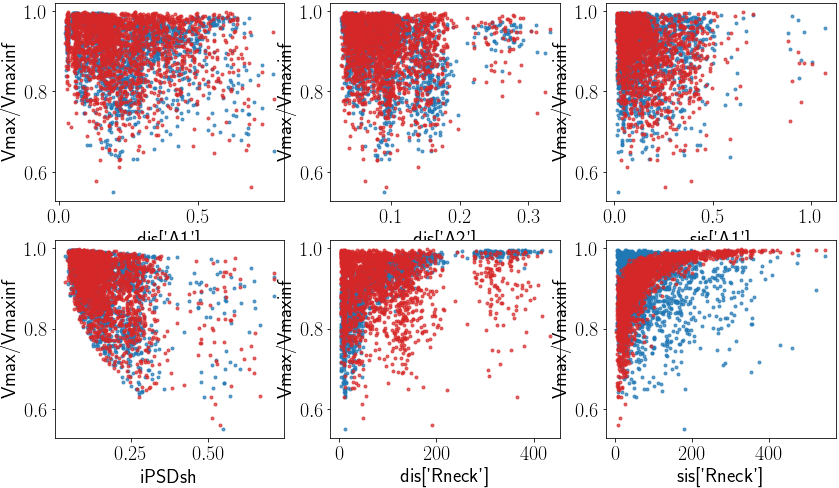

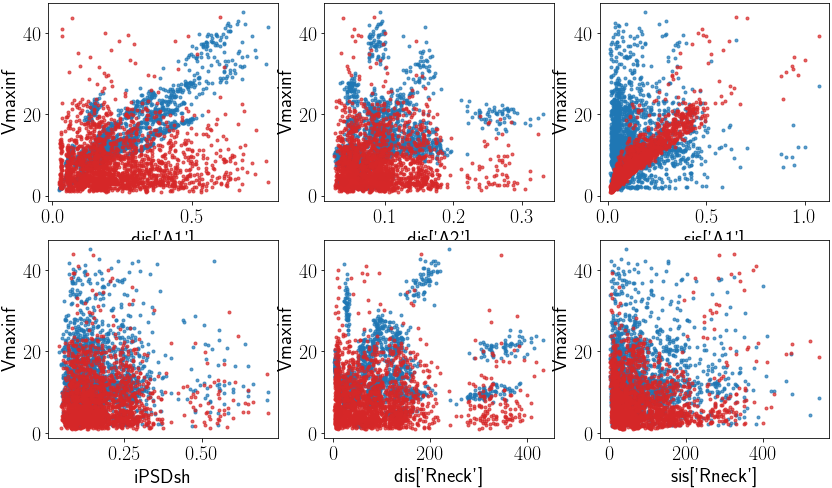

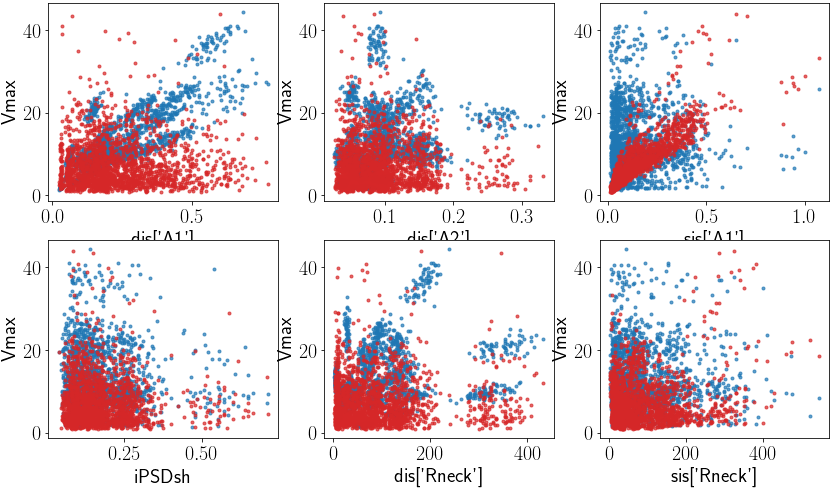

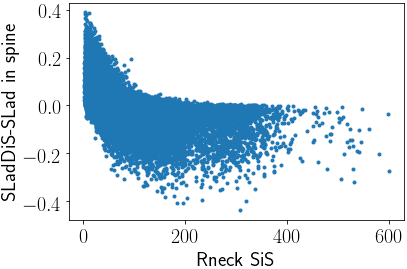

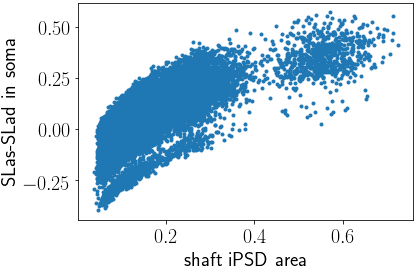

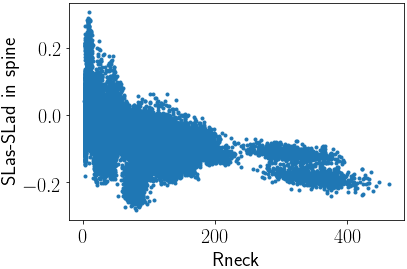

In [52]:
figure()
i = 1
fig, ax = subplots(2,3,figsize=(14,8))
labels= ["dis['A1']","dis['A2']","sis['A1']","iPSDsh","dis['Rneck']","sis['Rneck']"]
sel = arange(2000)
for j in range(6):
    ax[j//3,j%3].plot(fdatf[sel,j],(fap0f[sel,4]/fap0f[sel,3]),'C0.',alpha=0.7)
    ax[j//3,j%3].plot(fdatf[sel,j],(fap0f[sel,1]/fap0f[sel,0]),'C3.',alpha=0.7)
    ax[j//3,j%3].set_xlabel(labels[j])
    ax[j//3,j%3].set_ylabel('Vmax/Vmaxinf')
    
fig, ax = subplots(2,3,figsize=(14,8))
labels= ["dis['A1']","dis['A2']","sis['A1']","iPSDsh","dis['Rneck']","sis['Rneck']"]
sel = arange(2000)
for j in range(6):
    ax[j//3,j%3].plot(fdatf[sel,j],(fap0f[sel,3]),'C0.',alpha=0.7)
    ax[j//3,j%3].plot(fdatf[sel,j],(fap0f[sel,0]),'C3.',alpha=0.7)
    ax[j//3,j%3].set_xlabel(labels[j])
    ax[j//3,j%3].set_ylabel('Vmaxinf')
    
fig, ax = subplots(2,3,figsize=(14,8))
labels= ["dis['A1']","dis['A2']","sis['A1']","iPSDsh","dis['Rneck']","sis['Rneck']"]
sel = arange(2000)
for j in range(6):
    ax[j//3,j%3].plot(fdatf[sel,j],(fap0f[sel,4]),'C0.',alpha=0.7)
    ax[j//3,j%3].plot(fdatf[sel,j],(fap0f[sel,1]),'C3.',alpha=0.7)
    ax[j//3,j%3].set_xlabel(labels[j])
    ax[j//3,j%3].set_ylabel('Vmax')
    
figure()
plot(fdatf[:,5],(fap0f[:,4]/fap0f[:,3]-fap0f[:,1]/fap0f[:,0]),'.')
ylabel('SLadDiS-SLad in spine')
rr = fdatf[:,4].std(),fdatf[:,5].std()
print(rr)
#print(fdatf[rr>40,5][:],fdatf[rr>40,4][:])
xlabel('Rneck SiS')
figure()
plot(fdatf[:,3],(fapSf[:,5]/fapSf[:,3]-fapSf[:,4]/fapSf[:,3]),'.')
xlabel('shaft iPSD area')
ylabel('SLas-SLad in soma')
figure()
plot(fdatf[:,4],(fap0f[:,5]/fap0f[:,3]-fap0f[:,4]/fap0f[:,3]),'.')
xlabel('Rneck')
ylabel('SLas-SLad in spine')
print(fdatf.shape)
print((fap0f[:,4]/fap0f[:,3]).mean()-(fap0f[:,1]/fap0f[:,0]).mean())
print((fap0f[:,2]/fap0f[:,0]).mean()-(fap0f[:,1]/fap0f[:,0]).mean())
print((fap0f[:,5]/fap0f[:,3]).mean()-(fap0f[:,4]/fap0f[:,3]).mean())

(166.0738741196361, 156.56757372566383)
(25000, 6)
0.07928463571587108
0.06767642295659537
-0.03750278813823715


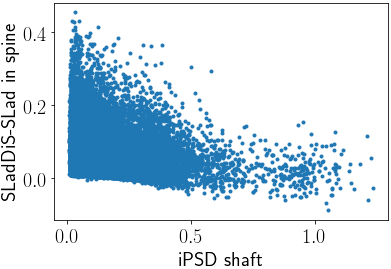

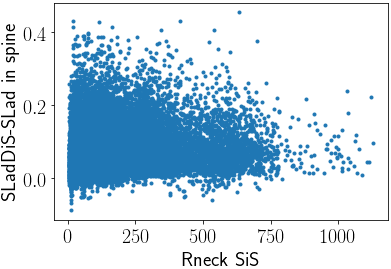

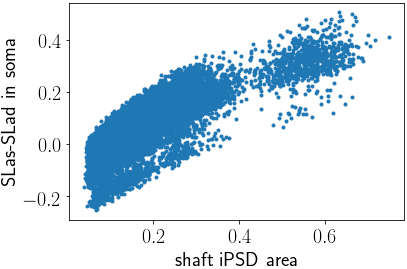

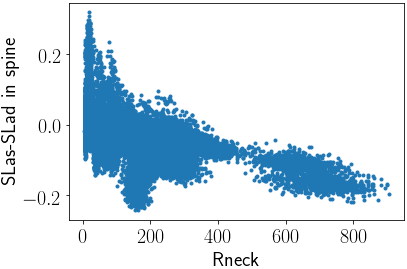

In [111]:
figure()
plot(fdatf[:,2],(fap0f[:,4]/fap0f[:,3]-fap0f[:,1]/fap0f[:,0]),'.')
xlabel('iPSD shaft')
ylabel('SLadDiS-SLad in spine')
figure()
plot(fdatf[:,5],(fap0f[:,4]/fap0f[:,3]-fap0f[:,1]/fap0f[:,0]),'.')
ylabel('SLadDiS-SLad in spine')
rr = fdatf[:,4].std(),fdatf[:,5].std()
print(rr)
#print(fdatf[rr>40,5][:],fdatf[rr>40,4][:])
xlabel('Rneck SiS')
figure()
plot(fdatf[:,3],(fapSf[:,5]/fapSf[:,3]-fapSf[:,4]/fapSf[:,3]),'.')
xlabel('shaft iPSD area')
ylabel('SLas-SLad in soma')
figure()
plot(fdatf[:,4],(fap0f[:,5]/fap0f[:,3]-fap0f[:,4]/fap0f[:,3]),'.')
xlabel('Rneck')
ylabel('SLas-SLad in spine')
print(fdatf.shape)
print((fap0f[:,4]/fap0f[:,3]).mean()-(fap0f[:,1]/fap0f[:,0]).mean())
print((fap0f[:,2]/fap0f[:,0]).mean()-(fap0f[:,1]/fap0f[:,0]).mean())
print((fap0f[:,5]/fap0f[:,3]).mean()-(fap0f[:,4]/fap0f[:,3]).mean())

In [75]:
lab='Vspine'
print('In spine')
axsp = 1 # axo-spinous
xt,yt = shle[lab][:,0],shle[lab][:,1+axsp*5]
sel = xt>=0
par = polyfit(xt[sel],log(yt[sel]),1)
print('AS inh: On-path decaying-length',-1.0/par[0])
sel = xt<=0
par = polyfit(abs(xt[sel]),log(yt[sel]),1)
print('AS inh: Off-path decaying-length',-1.0/par[0])

axsp = 0 # axo-dendritic
xt,yt = shle[lab][:,0],shle[lab][:,1+axsp*5]
sel = xt>=0
par = polyfit(xt[sel],log(yt[sel]),1)
print('AD inh: On-path decaying-length',-1.0/par[0])
sel = xt<=0
par = polyfit(abs(xt[sel]),log(yt[sel]),1)
print('AD inh: Off-path decaying-length',-1.0/par[0])
#print(xt,yt)

In spine
AS inh: On-path decaying-length 30.797147283561902
AS inh: Off-path decaying-length 11.155689373466346
AD inh: On-path decaying-length 30.18494244457439
AD inh: Off-path decaying-length 10.81033371649255


In [76]:
lab='Vsoma'
print('In soma')

axsp = 1 # axo-spinous
xt,yt = shle[lab][:,0],shle[lab][:,1+axsp*5]
sel = xt<=0
par = polyfit(abs(xt[sel]),log(yt[sel]),1)
print('AS inh: Off-path decaying-length',-1.0/par[0])

axsp = 0 # axo-dendritic
xt,yt = shle[lab][:,0],shle[lab][:,1+axsp*5]
sel = xt<=0
par = polyfit(abs(xt[sel]),log(yt[sel]),1)
print('AD inh: Off-path decaying-length',-1.0/par[0])
#print(xt,yt)

In soma
AS inh: Off-path decaying-length 26.35749396565347
AD inh: Off-path decaying-length 26.968847061432708


In [139]:
temp = 1-fapSf[:,5]/fapSf[:,3]
temp.sort()
sh = temp.shape[0]
nmed = sh//2
nl1, nv1 = int(sh*0.16),int(sh*(1-0.16))
print(temp[nmed],temp[nl1],temp[nv1])
temp = 1-fap0f[:,5]/fap0f[:,3]
temp.sort()
sh = temp.shape[0]
nmed = sh//2
nl1, nv1 = int(sh*0.16),int(sh*(1-0.16))
print(temp[nmed],temp[nl1],temp[nv1])

0.1395349195427401 0.08284622608174264 0.20919604803311476
0.10593831016894106 0.060469570488536184 0.15375555905387894


0.8854699454310783 0.8555628834297035


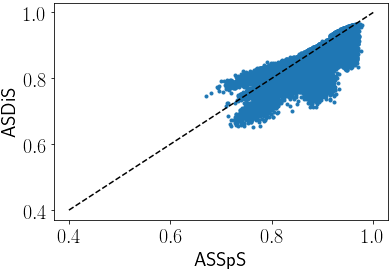

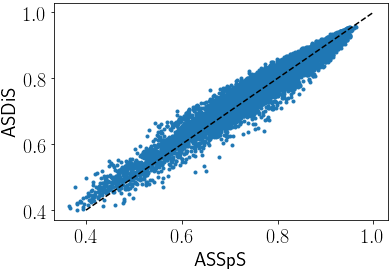

In [82]:
plot(fapSf[:,2]/fapSf[:,0],fapSf[:,5]/fapSf[:,3],'.')
print((fapSf[:,2]/fapSf[:,0]).mean(),(fapSf[:,5]/fapSf[:,3]).mean())
xlabel('ASSpS')
ylabel('ASDiS')
xs = linspace(0.4,1.,10)
plot(xs,xs,'k--')
figure()
plot(fapSf[:,1]/fapSf[:,0],fapSf[:,4]/fapSf[:,3],'.')
xlabel('ASSpS')
ylabel('ASDiS')
xs = linspace(0.4,1.,10)
plot(xs,xs,'k--')

(25000, 6)
0.896026082226089 0.8604872160850078 0.8132006615834348 0.8191282327287502
0.9262461829358195 0.8940633619743504 0.8132006615834348 0.8191282327287502


0.025894575378961494

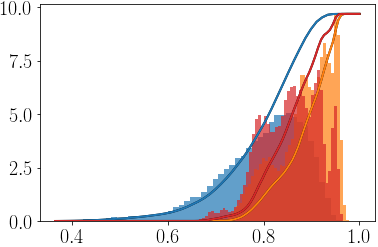

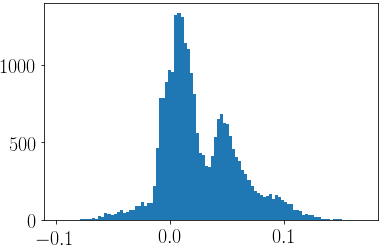

In [111]:
print(fapDf.shape)
h2 = hist(fapSf[:,1]/fapSf[:,0],51,alpha=0.7,label='A-D',color = 'C0',density=True)
ht = hist(fapSf[:,2]/fapSf[:,0],51,label='A-S',color = 'C1',density=True,alpha=0.7)

#h2 = hist(fapDf[:,4]/fapDf[:,3],51,alpha=0.7,label='A-D',color = 'C2',density=True)
ht2 = hist(fapSf[:,5]/fapSf[:,3],51,label='A-S',color = 'C3',density=True,alpha=0.7)

myl = max([h2[0].max(),ht[0].max()])

mxl = (min(h2[1].min(),ht[1].min()),max(h2[1].max(),ht[1].max()))

htx = h2[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(h2[0])/sum(h2[0])
htx = concatenate(([mxl[0]],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
plot(htx,hty*myl,'k',linewidth=2)
plot(htx,hty*myl,'C0',linewidth=2)


htx = ht[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(ht[0])/sum(ht[0])
htx = concatenate(([mxl[0]],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
plot(htx,hty*myl,'k',linewidth=2)
plot(htx,hty*myl,'C1',linewidth=2)

htx = ht2[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(ht2[0])/sum(ht2[0])
htx = concatenate(([mxl[0]],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
plot(htx,hty*myl,'k',linewidth=2)
plot(htx,hty*myl,'C3',linewidth=2)

medAS = fapSf[:,5]/fapSf[:,3]
med2sp = fapSf[:,2]/fapSf[:,0]
dmaxs = med2sp-medAS

medAS.sort()
medDiSAD = fapSf[:,4]/fapSf[:,3]
medDiSAD.sort()
medAD = fapSf[:,1]/fapSf[:,0]
medAD.sort()

med2sp.sort()
nmed = med2sp.shape[0]//2
print(med2sp[nmed],medAS[nmed],medAD[nmed],medDiSAD[nmed])


medAS = fap0f[:,5]/fap0f[:,3]
med2sp = fap0f[:,2]/fap0f[:,0]
dmaxs = med2sp-medAS

medAS.sort()
medDiSAD = fapSf[:,4]/fapSf[:,3]
medDiSAD.sort()
medAD = fapSf[:,1]/fapSf[:,0]
medAD.sort()

med2sp.sort()
nmed = med2sp.shape[0]//2
print(med2sp[nmed],medAS[nmed],medAD[nmed],medDiSAD[nmed])
figure()
h = hist(dmaxs,100)
dmaxs.sort()
dmaxs.mean()

In [112]:
0.9262461829358195-0.8940633619743504

0.03218282096146907

(500, 6)
0.8965981169856031 0.8591310524644493 0.8224984979878023 0.8290461180109078


0.02972408607134419

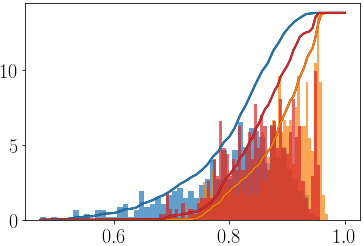

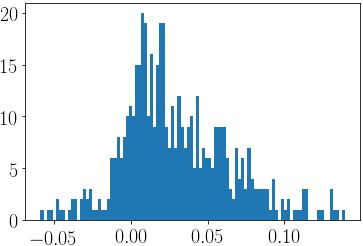

In [157]:
with open("gatinginfo_f_bRn_tempx2.pickle","rb") as f:
    fapSf,fapDf,fap0f,fapCf,fdatf = pickle.load(f)
    
print(fapDf.shape)
h2 = hist(fapSf[:,1]/fapSf[:,0],51,alpha=0.7,label='A-D',color = 'C0',density=True)
ht = hist(fapSf[:,2]/fapSf[:,0],51,label='A-S',color = 'C1',density=True,alpha=0.7)

#h2 = hist(fapDf[:,4]/fapDf[:,3],51,alpha=0.7,label='A-D',color = 'C2',density=True)
ht2 = hist(fapSf[:,5]/fapSf[:,3],51,label='A-S',color = 'C3',density=True,alpha=0.7)

myl = max([h2[0].max(),ht[0].max()])

mxl = (min(h2[1].min(),ht[1].min()),max(h2[1].max(),ht[1].max()))

htx = h2[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(h2[0])/sum(h2[0])
htx = concatenate(([mxl[0]],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
plot(htx,hty*myl,'k',linewidth=2)
plot(htx,hty*myl,'C0',linewidth=2)


htx = ht[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(ht[0])/sum(ht[0])
htx = concatenate(([mxl[0]],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
plot(htx,hty*myl,'k',linewidth=2)
plot(htx,hty*myl,'C1',linewidth=2)

htx = ht2[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(ht2[0])/sum(ht2[0])
htx = concatenate(([mxl[0]],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
plot(htx,hty*myl,'k',linewidth=2)
plot(htx,hty*myl,'C3',linewidth=2)

medAS = fapSf[:,5]/fapSf[:,3]
med2sp = fapSf[:,2]/fapSf[:,0]
dmaxs = med2sp-medAS

medAS.sort()
medDiSAD = fapSf[:,4]/fapSf[:,3]
medDiSAD.sort()
medAD = fapSf[:,1]/fapSf[:,0]
medAD.sort()

med2sp.sort()
nmed = med2sp.shape[0]//2
print(med2sp[nmed],medAS[nmed],medAD[nmed],medDiSAD[nmed])
figure()
h = hist(dmaxs,100)
dmaxs.sort()
dmaxs.mean()

(500, 6)
0.8674480881050555 0.9017686494410869 0.7709234643449948 0.9126801997914598


-0.05796664671387342

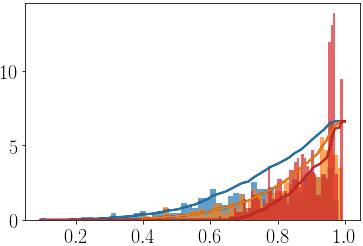

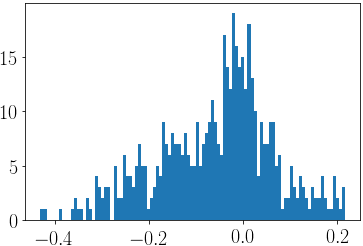

In [158]:
with open("gatinginfo_f_bRn_tempx2.pickle","rb") as f:
    fapSf,fapDf,fap0f,fapCf,fdatf = pickle.load(f)
    
print(fapDf.shape)
h2 = hist(fapCf[:,1]/fapCf[:,0],51,alpha=0.7,label='A-D',color = 'C0',density=True)
ht = hist(fapCf[:,2]/fapCf[:,0],51,label='A-S',color = 'C1',density=True,alpha=0.7)

#h2 = hist(fapDf[:,4]/fapDf[:,3],51,alpha=0.7,label='A-D',color = 'C2',density=True)
ht2 = hist(fapCf[:,5]/fapCf[:,3],51,label='A-S',color = 'C3',density=True,alpha=0.7)

myl = max([h2[0].max(),ht[0].max()])

mxl = (min(h2[1].min(),ht[1].min()),max(h2[1].max(),ht[1].max()))

htx = h2[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(h2[0])/sum(h2[0])
htx = concatenate(([mxl[0]],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
plot(htx,hty*myl,'k',linewidth=2)
plot(htx,hty*myl,'C0',linewidth=2)


htx = ht[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(ht[0])/sum(ht[0])
htx = concatenate(([mxl[0]],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
plot(htx,hty*myl,'k',linewidth=2)
plot(htx,hty*myl,'C1',linewidth=2)

htx = ht2[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(ht2[0])/sum(ht2[0])
htx = concatenate(([mxl[0]],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
plot(htx,hty*myl,'k',linewidth=2)
plot(htx,hty*myl,'C3',linewidth=2)

medAS = fapCf[:,5]/fapCf[:,3]
med2sp = fapCf[:,2]/fapCf[:,0]
dmaxs = med2sp-medAS

medAS.sort()
medDiSAD = fapCf[:,4]/fapCf[:,3]
medDiSAD.sort()
medAD = fapCf[:,1]/fapCf[:,0]
medAD.sort()

med2sp.sort()
nmed = med2sp.shape[0]//2
print(med2sp[nmed],medAS[nmed],medAD[nmed],medDiSAD[nmed])
figure()
h = hist(dmaxs,100)
dmaxs.sort()
dmaxs.mean()

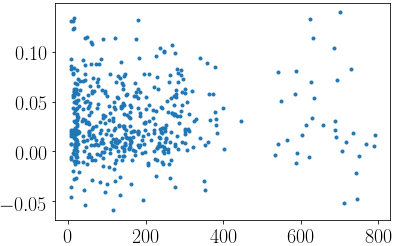

In [156]:
plot(fdatf[:,4],dmaxs,'.')


In [140]:
print(fapDf.shape)
h2 = hist(fapDh[:,1]/fapDh[:,0],51,alpha=0.7,label='A-D',color = 'C0',density=True)
ht = hist(fapDh[:,2]/fapDh[:,0],51,label='A-S',color = 'C1',density=True,alpha=0.7)

#h2 = hist(fapDf[:,4]/fapDf[:,3],51,alpha=0.7,label='A-D',color = 'C2',density=True)
ht2 = hist(fapDh[:,5]/fapDh[:,3],51,label='A-S',color = 'C3',density=True,alpha=0.7)

myl = max([h2[0].max(),ht[0].max()])

mxl = (min(h2[1].min(),ht[1].min()),max(h2[1].max(),ht[1].max()))

htx = h2[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(h2[0])/sum(h2[0])
htx = concatenate(([mxl[0]],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
plot(htx,hty*myl,'k',linewidth=2)
plot(htx,hty*myl,'C0',linewidth=2)


htx = ht[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(ht[0])/sum(ht[0])
htx = concatenate(([mxl[0]],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
plot(htx,hty*myl,'k',linewidth=2)
plot(htx,hty*myl,'C1',linewidth=2)

htx = ht2[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(ht2[0])/sum(ht2[0])
htx = concatenate(([mxl[0]],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
plot(htx,hty*myl,'k',linewidth=2)
plot(htx,hty*myl,'C3',linewidth=2)

medAS = fapDh[:,5]/fapDh[:,3]
medAS.sort()
medAD = fapDh[:,1]/fapDh[:,0]
medAD.sort()
med2sp = fapDh[:,2]/fapDh[:,0]
med2sp.sort()
nmed = med2sp.shape[0]//2
print(med2sp[nmed],medAS[nmed],medAD[nmed])


(500, 6)


NameError: name 'fapDh' is not defined

In [51]:
with open("gatinginfo_f_bRn_temp.pickle","rb") as f:
    fapSf1,fapDf1,fap0f1,fapCf1,fdatf1 = pickle.load(f)

Text(0.5, 0, '$V_{soma}$: 2nd sp exc+AS inh')

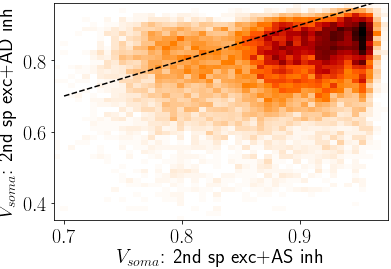

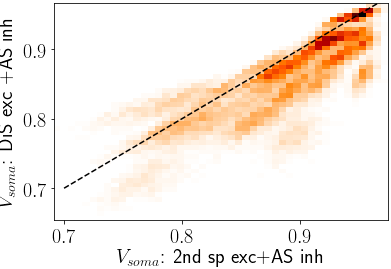

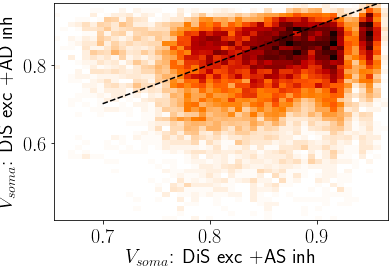

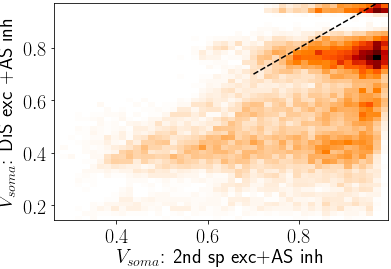

In [135]:
sel = permutation(arange(fapDf.shape[0]))#[:1500]
yt,xt = fapSf[sel,1]/fapSf[sel,0],fapSf[sel,2]/fapSf[sel,0]
#scatter(fapDh[sel,2]/fapDh[sel,0],fapDh[sel,1]/fapDh[sel,0],alpha=0.3)
#scatter(xt,yt,alpha=0.3)
counts,ybins,xbins,image = hist2d(xt,yt,46,cmap='gist_heat_r')
#contour(counts,extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()],linewidths=2)
plot(linspace(0.7,1),linspace(0.7,1),'k--')
ylabel('$V_{soma}$: 2nd sp exc+AD inh')
xlabel('$V_{soma}$: 2nd sp exc+AS inh')

figure()
yt,xt = fapSf[sel,5]/fapSf[sel,3],fapSf[sel,2]/fapSf[sel,0]
#scatter(fapDh[sel,2]/fapDh[sel,0],fapDh[sel,1]/fapDh[sel,0],alpha=0.3)
#scatter(xt,yt,alpha=0.3)
counts,ybins,xbins,image = hist2d(xt,yt,46,cmap='gist_heat_r')
#contour(counts,extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()],linewidths=2)
plot(linspace(0.7,1),linspace(0.7,1),'k--')
ylabel('$V_{soma}$: DiS exc   +AS inh')
xlabel('$V_{soma}$: 2nd sp exc+AS inh')

figure()
yt,xt = fapSf[sel,4]/fapSf[sel,3],fapSf[sel,5]/fapSf[sel,3]
#scatter(fapDh[sel,2]/fapDh[sel,0],fapDh[sel,1]/fapDh[sel,0],alpha=0.3)
#scatter(xt,yt,alpha=0.3)
counts,ybins,xbins,image = hist2d(xt,yt,46,cmap='gist_heat_r')
#contour(counts,extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()],linewidths=2)
plot(linspace(0.7,1),linspace(0.7,1),'k--')
ylabel('$V_{soma}$: DiS exc +AD inh')
xlabel('$V_{soma}$: DiS exc +AS inh')

figure()
yt,xt = fapCf[sel,5]/fapCf[sel,3],fapCf[sel,2]/fapCf[sel,0]
#scatter(fapDh[sel,2]/fapDh[sel,0],fapDh[sel,1]/fapDh[sel,0],alpha=0.3)
#scatter(xt,yt,alpha=0.3)
counts,ybins,xbins,image = hist2d(xt,yt,46,cmap='gist_heat_r')
#contour(counts,extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()],linewidths=2)
plot(linspace(0.7,1),linspace(0.7,1),'k--')
ylabel('$V_{soma}$: DiS exc   +AS inh')
xlabel('$V_{soma}$: 2nd sp exc+AS inh')

#figure()
#title('Rneck*2')
#yt,xt = fapDf1[:,5]/fapDf1[:,3],fapDf1[:,2]/fapDf1[:,0]
##scatter(fapDh[sel,2]/fapDh[sel,0],fapDh[sel,1]/fapDh[sel,0],alpha=0.3)
##scatter(xt,yt,alpha=0.3)
#counts,ybins,xbins,image = hist2d(xt,yt,46,cmap='gist_heat_r')
##contour(counts,extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()],linewidths=2)
#plot(linspace(0.7,1),linspace(0.7,1),'k--')
#ylabel('$V_D$: DiS exc   +AS inh')
#xlabel('$V_D$: 2nd sp exc+AS inh')

In [122]:
axsp = 1
lab = 'Vspine'
# : $ShntI/ShntI_0$
sel = shleh0[lab][:,1+axsp*5]>exp(-2)
print(exp(-1))
column_stack((shleh0[lab][sel,0],shleh0[lab][sel,1+axsp*5]))


0.36787944117144233


array([[-37.5       ,   0.1599462 ],
       [-30.        ,   0.24325957],
       [-22.5       ,   0.3633654 ],
       [-15.        ,   0.52851841],
       [ -7.5       ,   0.7385429 ],
       [  0.        ,   1.        ],
       [  7.5       ,   0.74343892],
       [ 15.        ,   0.55253843],
       [ 22.5       ,   0.4207566 ],
       [ 30.        ,   0.32600692],
       [ 37.5       ,   0.23661338],
       [ 45.        ,   0.16266146]])

2.233031721114037 1.6057627532946321 0.0007176889079238968 0.727798361731033
5.482868973357116 2.113140178459555 -0.3920236856467585 0.23178173770359903


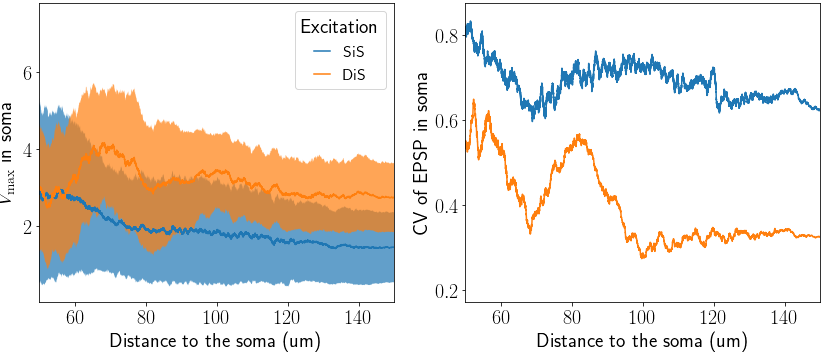

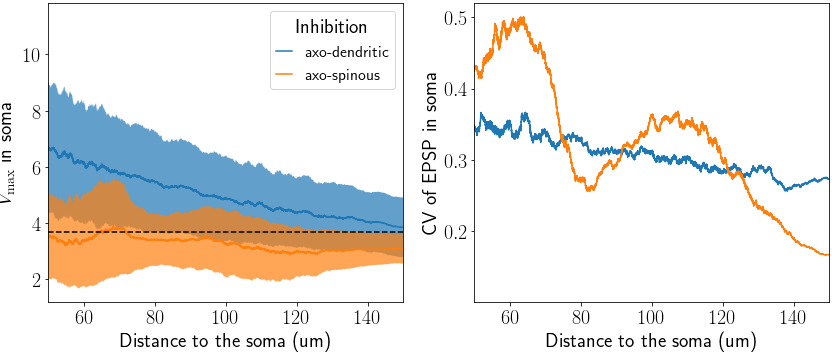

In [124]:
sel = mVs[:,-2] == 1
mVav = mVs[:,2].mean()
s1 = permutation(arange(mVs.shape[0])[sel])
s2 = permutation(arange(mVs.shape[0])[~sel])

fig = figure(figsize=(14,5.5))

fig.add_subplot(121)
xt,yt = mVs[s1,-1],mVs[s1,2]
sel = xt.argsort(); xt = xt[sel]; yt = yt[sel]
n = 800
xt = running_mean(xt,n)
yt2 = running_std(yt,n)
yt = running_mean(yt,n)
plot(xt,yt,label='SiS')
fill_between(xt,yt+yt2,yt-yt2,alpha=0.7)


xt,yt = mVs[s2,-1],mVs[s2,2]
sel = xt.argsort(); xt = xt[sel]; yt = yt[sel]
n = 200
xt = running_mean(xt,n)
yt2 = running_std(yt,n)

yt = running_mean(yt,n)
plot(xt,yt,label='DiS')
legend(title='Excitation')
ylabel('$V_{\max}$ in soma')
xlabel('Distance to the soma (um)')
fill_between(xt,yt+yt2,yt-yt2,alpha=0.7)

xlim(50,150)
fig.add_subplot(122)
xt,yt = mVs[s1,-1],mVs[s1,2]
sel = xt.argsort(); xt = xt[sel]; yt = yt[sel]
n = 800
xt = running_mean(xt,n)
yt2 = running_std(yt,n)
yt = running_mean(yt,n)
plot(xt,yt2/yt,label='SiS')


xt,yt = mVs[s2,-1],mVs[s2,2]
sel = xt.argsort(); xt = xt[sel]; yt = yt[sel]
n = 200
xt = running_mean(xt,n)
yt2 = running_std(yt,n)
yt = running_mean(yt,n)
plot(xt,yt2/yt,label='DiS')
ylabel('CV of EPSP in soma')
xlabel('Distance to the soma (um)')

xlim(50,150)
fig = figure(figsize=(14,5.5))

fig.add_subplot(121)
print(mVav,mVs[:,2].std(), mVs[~sel,2].mean()/mVav-1, mVs[~sel,2].std()/mVav)

mVav = mVIs[:,5].mean()
s1 = arange(mVIs.shape[0])
h = axl3.scatter(mVIs[s1,-1],mVIs[s1,5],marker='.',label='axo-dendritic',alpha=0.3)
axl3.scatter(mVIs[s1,-1],mVIs[s1,2],marker='.',label='axo-spinous',alpha=0.3)

xt,yt = mVIs[:,-1],mVIs[:,5]
sel = xt.argsort(); xt = xt[sel]; yt = yt[sel]
n = 800
xt = running_mean(xt,n)
yt2 = running_std(yt,n)
yt = running_mean(yt,n)
plot(xt,yt,label='axo-dendritic')
fill_between(xt,yt+yt2,yt-yt2,alpha=0.7)

xt,yt = mVIs[:,-1],mVIs[:,2]
sel = xt.argsort(); xt = xt[sel]; yt = yt[sel]
xt = running_mean(xt,n)
yt2 = running_std(yt,n)
yt = running_mean(yt,n)
plot(xt,yt,label='axo-spinous')
legend(title='Inhibition')
ylabel('$V_{\max}$ in soma')
xlabel('Distance to the soma (um)')
fill_between(xt,yt+yt2,yt-yt2,alpha=0.7)
plot(linspace(50,150),linspace(50,150)*0+3.7,'k--')
xlim(50,150)
fig.add_subplot(122)
xt,yt = mVIs[:,-1],mVIs[:,5]
sel = xt.argsort(); xt = xt[sel]; yt = yt[sel]
xt = running_mean(xt,n)
yt2 = running_std(yt,n)
yt = running_mean(yt,n)
plot(xt,yt2/yt,label='SiS')


xt,yt = mVIs[:,-1],mVIs[:,2]
sel = xt.argsort(); xt = xt[sel]; yt = yt[sel]
xt = running_mean(xt,n)
yt2 = running_std(yt,n)
yt = running_mean(yt,n)
plot(xt,yt2/yt,label='DiS')
ylabel('CV of EPSP in soma')
xlabel('Distance to the soma (um)')

xlim(50,150)
print(mVav,mVIs[:,5].std(), mVIs[:,2].mean()/mVav-1, mVIs[:,2].std()/mVav)

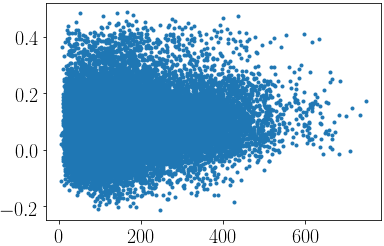

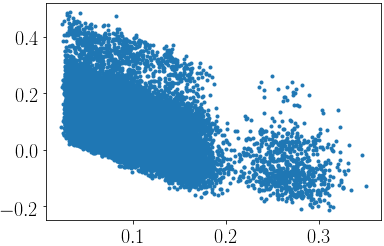

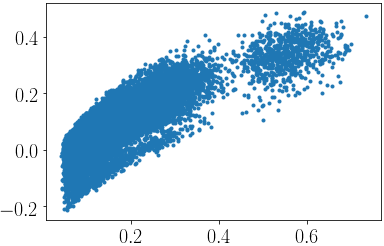

In [195]:
plot(fdatf[:,5]+fdatf[:,4],(fap0f[:,2]-fap0f[:,1])/fap0f[:,0],'.')
figure()
plot(fdatf[:,1],(fap0f[:,2]-fap0f[:,1])/fap0f[:,0],'.')
figure()
plot(fdatf[:,3],(fap0f[:,2]-fap0f[:,1])/fap0f[:,0],'.')

In [196]:
sc = scatter(fdatf[:,1],fdatf[:,3],c= (fap0f[:,2]-fap0f[:,1])/fap0f[:,0],alpha=0.6,cmap='seismic')
colorbar()
xlabel('A_{iDiS}')
ylabel('A_{iSh}')
sc.set_clim(-0.3, 0.3)
plot(linspace(0,0.35),linspace(0,0.35),'k--')

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fad606109d8> (for post_execute):


RuntimeError: latex was not able to process the following string:
b'A_{iDiS}'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/users/bssn/serna/.cache/matplotlib/tex.cache/c9ce4188823ecd80f016c9bda8337627
.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 9 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amssymb.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amsfonts.sty))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

)
No file c9ce4188823ecd80f016c9bda8337627.aux.
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.14 \fontsize{20.000000}{25.000000}{\sffamily A_
                                                 {iDiS}}
No pages of output.
Transcript written on c9ce4188823ecd80f016c9bda8337627.log.




RuntimeError: latex was not able to process the following string:
b'A_{iDiS}'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/users/bssn/serna/.cache/matplotlib/tex.cache/c9ce4188823ecd80f016c9bda8337627
.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 9 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amssymb.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amsfonts.sty))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./c9ce4188823ecd80f016c9bda8337627.aux)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.14 \fontsize{20.000000}{25.000000}{\sffamily A_
                                                 {iDiS}}
No pages of output.
Transcript written on c9ce4188823ecd80f016c9bda8337627.log.




<Figure size 432x288 with 2 Axes>

In [197]:
#taken from http://chris35wills.github.io/matplotlib_diverging_colorbar/
class MidpointNormalize(matplotlib.colors.Normalize):
    """
    Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)
    e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        matplotlib.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

In [198]:
with open("gatinginfo_f.pickle","rb") as f:
    fapSf,fapDf,fap0f,fapCf,fdatf = pickle.load(f)
x,y,z =fdatf[:,1],fdatf[:,3], (fap0f[:,2]-fap0f[:,1])/fap0f[:,0]
sc = scatter(x,y,c='k',alpha=0.2)
sc = scatter(x,y,c=z,alpha=0.6,cmap='seismic',norm = MidpointNormalize(midpoint = 0., vmin = -0.3, vmax = 0.5))
colorbar()
xlabel('A_{iDiS}')
ylabel('A_{iSh}')
#plot(linspace(0,0.35),0.85*linspace(0,0.35)+0.,'k--')
#plot(linspace(0,0.35),1*linspace(0,0.35)+0.1,'k--')
plot(linspace(0,0.35),1.4*linspace(0,0.35)+0.18,'k--')

triang = matplotlib.tri.Triangulation(x, y)
TR = tricontour(x, y, z, arange(-0.3,0.6,0.1), linewidths=0.5, colors='k')
#clabel(TR, inline=1, fontsize=10)
#tricontourf(x, y, z, arange(-0.3,0.6,0.1))

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fad606109d8> (for post_execute):


RuntimeError: latex was not able to process the following string:
b'A_{iDiS}'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/users/bssn/serna/.cache/matplotlib/tex.cache/c9ce4188823ecd80f016c9bda8337627
.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 9 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amssymb.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amsfonts.sty))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./c9ce4188823ecd80f016c9bda8337627.aux)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.14 \fontsize{20.000000}{25.000000}{\sffamily A_
                                                 {iDiS}}
No pages of output.
Transcript written on c9ce4188823ecd80f016c9bda8337627.log.




RuntimeError: latex was not able to process the following string:
b'A_{iDiS}'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/users/bssn/serna/.cache/matplotlib/tex.cache/c9ce4188823ecd80f016c9bda8337627
.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 9 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amssymb.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amsfonts.sty))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./c9ce4188823ecd80f016c9bda8337627.aux)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.14 \fontsize{20.000000}{25.000000}{\sffamily A_
                                                 {iDiS}}
No pages of output.
Transcript written on c9ce4188823ecd80f016c9bda8337627.log.




<Figure size 432x288 with 2 Axes>

Interpretation: When they have the same area, inhibition in shaft does slightly more effect ~0.003? than when it is in DiS. To have the same effect, A_{ish} should be 15% smaller (0.85 A_{ish}???!)? To have 0.1 more effect, A_{ish} has to be 0.1 um^2 larger than A_{iDiS}. And to have 0.2 more effect A_{ish} = 1.4 A_{iDiS} + 0.18

In [199]:
with open("gatinginfo_f_cm1.pickle","rb") as f:
    fapSf,fapDf,fap0f,fapCf,fdatf = pickle.load(f)
x,y,z =fdatf[:,1],fdatf[:,3], (fap0f[:,2]-fap0f[:,1])/fap0f[:,0]
sc = scatter(x,y,c='k',alpha=0.2)
sc = scatter(x,y,c=z,alpha=0.6,cmap='seismic',norm = MidpointNormalize(midpoint = 0., vmin = -0.3, vmax = 0.5))
colorbar()
xlabel('A_{iDiS}')
ylabel('A_{iSh}')
plot(linspace(0,0.35),0.85*linspace(0,0.35)+0.,'k--')
plot(linspace(0,0.35),1*linspace(0,0.35)+0.1,'k--')
plot(linspace(0,0.35),1.4*linspace(0,0.35)+0.18,'k--')

triang = matplotlib.tri.Triangulation(x, y)
TR = tricontour(x, y, z, arange(-0.3,0.6,0.1), linewidths=0.5, colors='k')
#clabel(TR, inline=1, fontsize=10)
#tricontourf(x, y, z, arange(-0.3,0.6,0.1))

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fad606109d8> (for post_execute):


RuntimeError: latex was not able to process the following string:
b'A_{iDiS}'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/users/bssn/serna/.cache/matplotlib/tex.cache/c9ce4188823ecd80f016c9bda8337627
.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 9 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amssymb.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amsfonts.sty))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./c9ce4188823ecd80f016c9bda8337627.aux)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.14 \fontsize{20.000000}{25.000000}{\sffamily A_
                                                 {iDiS}}
No pages of output.
Transcript written on c9ce4188823ecd80f016c9bda8337627.log.




RuntimeError: latex was not able to process the following string:
b'A_{iDiS}'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/users/bssn/serna/.cache/matplotlib/tex.cache/c9ce4188823ecd80f016c9bda8337627
.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 9 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amssymb.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amsfonts.sty))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./c9ce4188823ecd80f016c9bda8337627.aux)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.14 \fontsize{20.000000}{25.000000}{\sffamily A_
                                                 {iDiS}}
No pages of output.
Transcript written on c9ce4188823ecd80f016c9bda8337627.log.




<Figure size 432x288 with 2 Axes>